# Análise do PIB de países com Graph Neural Networks (GNN) Classification

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx


import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import KBinsDiscretizer
import plotly.express as px


### Carregando o dataset com os países vizinhos

In [2]:
json_file_path = "nodes_and_links_countries.json"

with open(json_file_path, 'r') as j:
     jdict = json.loads(j.read())

### Carregando o dataset com os dados dos países

In [3]:
path = "countries of the world.csv"
df_gdp = pd.read_csv(path,decimal=',')
df_gdp.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48,124.6,13.8,290.4,152.1
Coastline (coast/area ratio),0,1.26,0.04,58.29,0
Net migration,23.06,-4.93,-0.39,-20.71,6.6
Infant mortality (per 1000 births),163.07,21.52,31,9.27,4.05
GDP ($ per capita),700,4500,6000,8000,19000
Literacy (%),36,86.5,70,97,100


In [4]:
### Removendo espaços ao final do nome dos países
df_gdp['Country'] = df_gdp['Country'].map(lambda x: str(x)[:-1])

### Alterando nomes de países para combinar os datasets

In [5]:
correspondence = {
   'Micronesia, Fed. St.':'Federated States of Micronesia',
   'Antigua & Barbuda':'Antigua and Barbuda',
   'Bahamas, The':'Bahamas',
   'Saint Kitts & Nevis': 'Saint Kitts and Nevis',
   'Trinidad & Tobago':'Trinidad and Tobago',
   'Central African Rep.': 'Central African Republic',
   'Congo, Dem. Rep.':'Democratic Republic of the Congo',
   'Congo, Repub. of the':'Republic of the Congo',
   "Cote d'Ivoire": "Côte d'Ivoire",
   'Gambia, The': 'The Gambia',
   'Sao Tome & Principe':'São Tomé and Príncipe',
   'Bosnia & Herzegovina': 'Bosnia and Herzegovina',
   'Macedonia':'North Macedonia',
   'China': "People's Republic of China",
   'Korea, North':'North Korea',
   'Korea, South':'South Korea',
   'Burma':'Myanmar'
    }

In [6]:
df_gdp = df_gdp.replace({"Country": correspondence})

In [7]:
countries_df = df_gdp['Country'].values
countries_nodes = ([node['name'] for node in jdict['nodes']])

mismatch = [i for i in countries_nodes if i not in countries_df]

print(
"countries_df: ",len(countries_df),
"countries_nodes: ",len(countries_nodes),
"mismatch: ",len(mismatch),
"mismatch countries:", mismatch
)

countries_df:  227 countries_nodes:  195 mismatch:  4 mismatch countries: ['South Sudan', 'Montenegro', 'Vatican City', 'Palestine']


In [8]:
nodes = set(countries_nodes)-set(mismatch)
len(nodes)

191

### Dataset com países correspondentes

In [9]:
nodes_df = [i for i in nodes]
df = df_gdp[df_gdp['Country'].isin(nodes_df)]
df.head(5).T

,0,1,2,4,5
Country,Afghanistan,Albania,Algeria,Andorra,Angola
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,WESTERN EUROPE,SUB-SAHARAN AFRICA
Population,31056997,3581655,32930091,71201,12127071
Area (sq. mi.),647500,28748,2381740,468,1246700
Pop. Density (per sq. mi.),48,124.6,13.8,152.1,9.7
Coastline (coast/area ratio),0,1.26,0.04,0,0.13
Net migration,23.06,-4.93,-0.39,6.6,0
Infant mortality (per 1000 births),163.07,21.52,31,4.05,191.19
GDP ($ per capita),700,4500,6000,19000,1900
Literacy (%),36,86.5,70,100,42


#### Tirando algumas colunas que não serão utilizadas na análise inicial

In [10]:
df.shape

(191, 20)

In [11]:
# df.drop(['Region', 'Net migration', 'Infant mortality (per 1000 births)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)','Other (%)', 'Birthrate', 'Deathrate'], axis=1, inplace=True)
df.drop(['Region'], axis=1, inplace=True)
df.head(5).T

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,4,5
Country,Afghanistan,Albania,Algeria,Andorra,Angola
Population,31056997,3581655,32930091,71201,12127071
Area (sq. mi.),647500,28748,2381740,468,1246700
Pop. Density (per sq. mi.),48,124.6,13.8,152.1,9.7
Coastline (coast/area ratio),0,1.26,0.04,0,0.13
Net migration,23.06,-4.93,-0.39,6.6,0
Infant mortality (per 1000 births),163.07,21.52,31,4.05,191.19
GDP ($ per capita),700,4500,6000,19000,1900
Literacy (%),36,86.5,70,100,42
Phones (per 1000),3.2,71.2,78.1,497.2,7.8


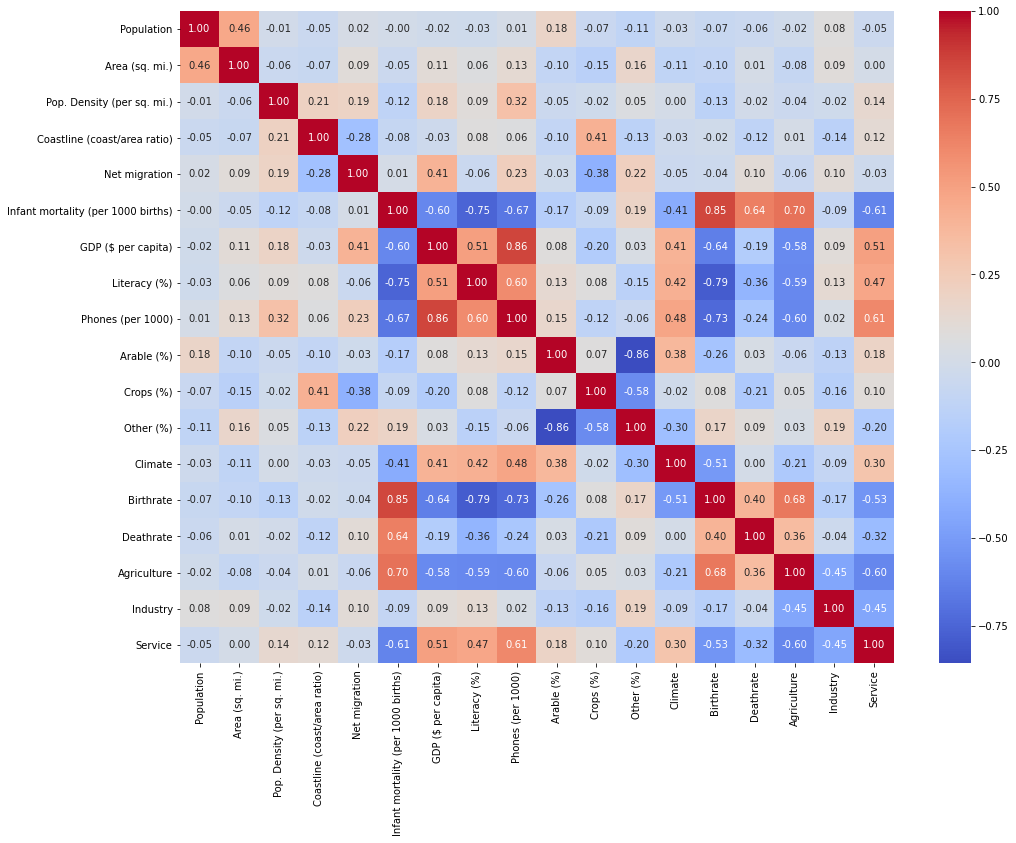

In [12]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [13]:
num = set(df.columns.to_list()) - {'Country', 'GDP ($ per capita)', 'Climate'}

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

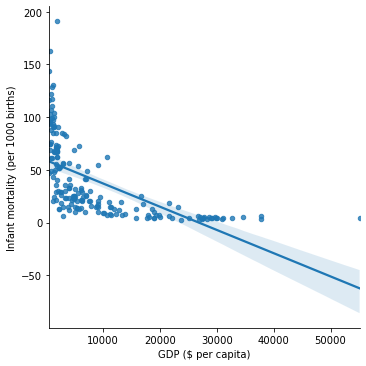

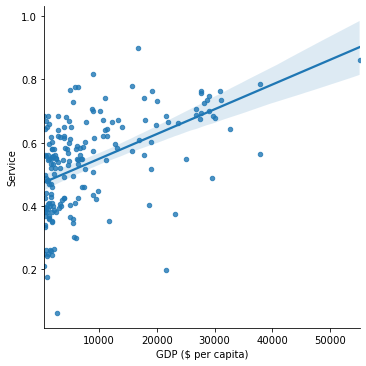

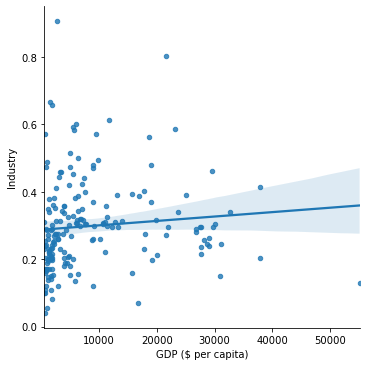

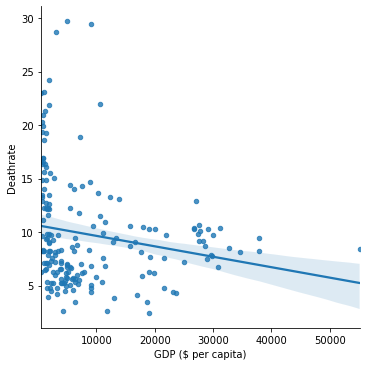

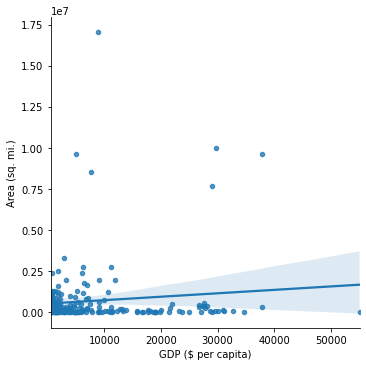

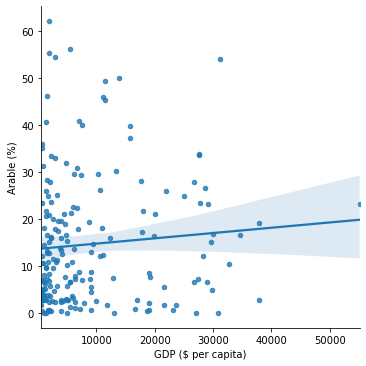

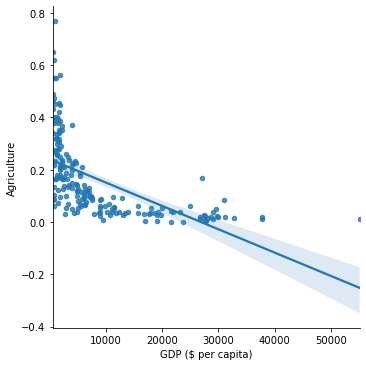

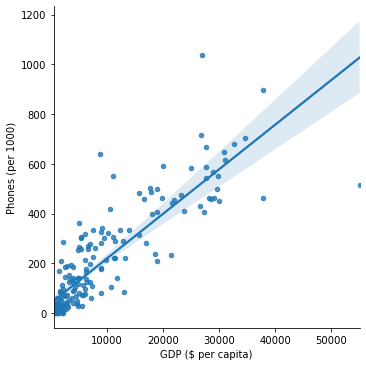

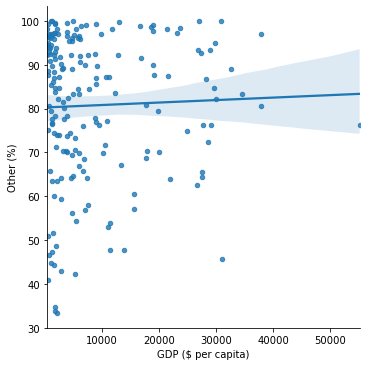

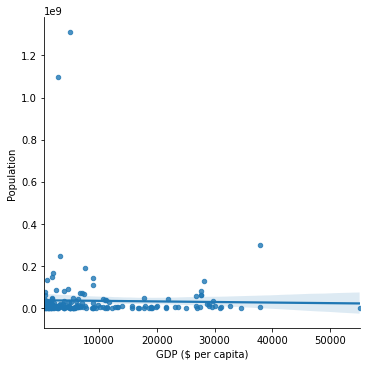

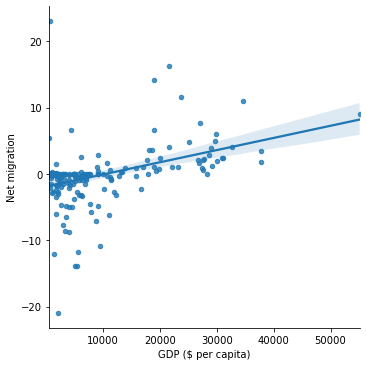

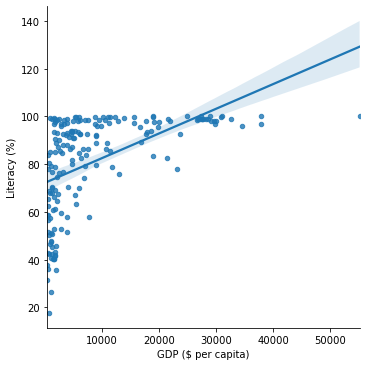

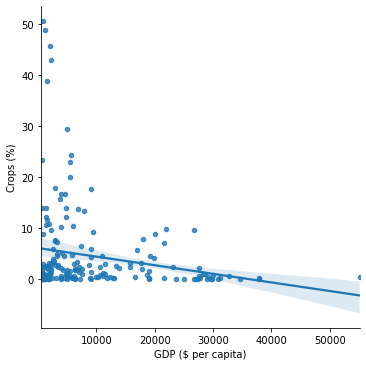

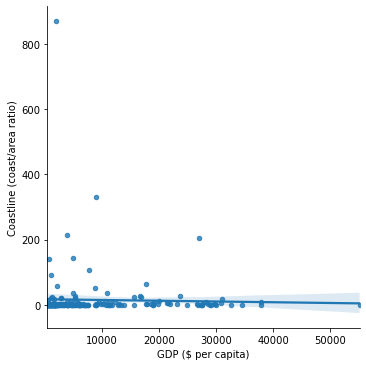

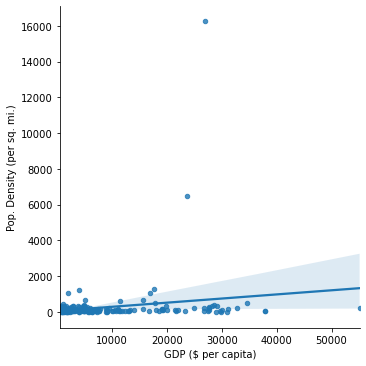

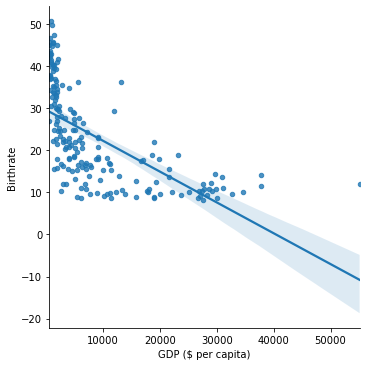

In [14]:
for n in num:
    sns.lmplot('GDP ($ per capita)', n, data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 20})

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area (sq. mi.)'}>,
        <AxesSubplot:title={'center':'Pop. Density (per sq. mi.)'}>,
        <AxesSubplot:title={'center':'Coastline (coast/area ratio)'}>],
       [<AxesSubplot:title={'center':'Net migration'}>,
        <AxesSubplot:title={'center':'Infant mortality (per 1000 births)'}>,
        <AxesSubplot:title={'center':'GDP ($ per capita)'}>,
        <AxesSubplot:title={'center':'Literacy (%)'}>],
       [<AxesSubplot:title={'center':'Phones (per 1000)'}>,
        <AxesSubplot:title={'center':'Arable (%)'}>,
        <AxesSubplot:title={'center':'Crops (%)'}>,
        <AxesSubplot:title={'center':'Other (%)'}>],
       [<AxesSubplot:title={'center':'Climate'}>,
        <AxesSubplot:title={'center':'Birthrate'}>,
        <AxesSubplot:title={'center':'Deathrate'}>,
        <AxesSubplot:title={'center':'Agriculture'}>],
       [<AxesSubplot:title={'center':'Industry'}>,
        <AxesSubplot:

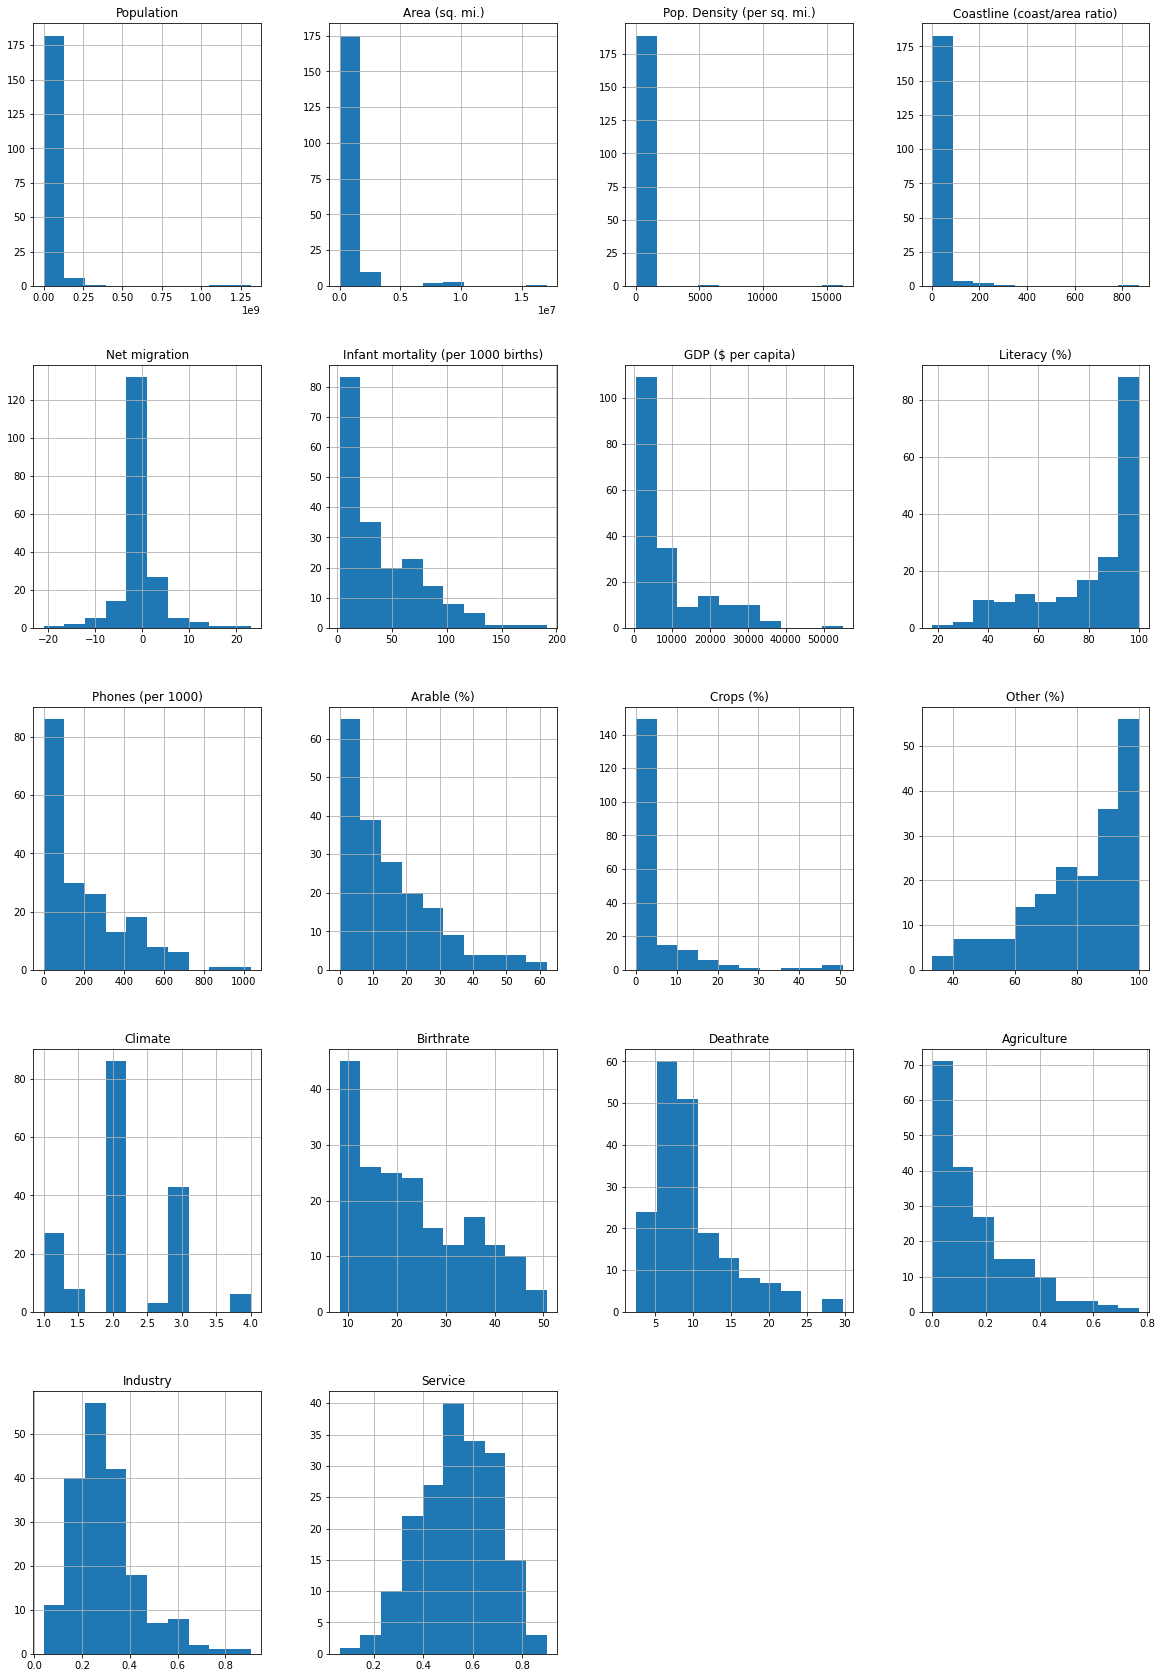

In [15]:
df.hist(figsize=(20,30))

In [16]:
df_filtered = df.copy()
df_filtered['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].apply(np.log10)
df_filtered['GDP ($ per capita)'] = df['GDP ($ per capita)'].apply(np.log10)
df_filtered['Phones (per 1000)'] = df['Phones (per 1000)'].apply(np.log10)
# df_filtered['Arable (%)'] = df['Arable (%)'].apply(np.log10)
# df_filtered['Crops (%)'] = df['Crops (%)'].apply(np.log10)
# df_filtered['Coastline (coast/area ratio)'] = df['Coastline (coast/area ratio)'].apply(np.log10)
df_filtered['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].apply(np.log10)
df_filtered['Other (%)'] = df['Other (%)'].apply(np.sqrt)
df_filtered['Literacy (%)'] = df['Literacy (%)'].apply(np.sqrt)


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area (sq. mi.)'}>,
        <AxesSubplot:title={'center':'Pop. Density (per sq. mi.)'}>,
        <AxesSubplot:title={'center':'Coastline (coast/area ratio)'}>],
       [<AxesSubplot:title={'center':'Net migration'}>,
        <AxesSubplot:title={'center':'Infant mortality (per 1000 births)'}>,
        <AxesSubplot:title={'center':'GDP ($ per capita)'}>,
        <AxesSubplot:title={'center':'Literacy (%)'}>],
       [<AxesSubplot:title={'center':'Phones (per 1000)'}>,
        <AxesSubplot:title={'center':'Arable (%)'}>,
        <AxesSubplot:title={'center':'Crops (%)'}>,
        <AxesSubplot:title={'center':'Other (%)'}>],
       [<AxesSubplot:title={'center':'Climate'}>,
        <AxesSubplot:title={'center':'Birthrate'}>,
        <AxesSubplot:title={'center':'Deathrate'}>,
        <AxesSubplot:title={'center':'Agriculture'}>],
       [<AxesSubplot:title={'center':'Industry'}>,
        <AxesSubplot:

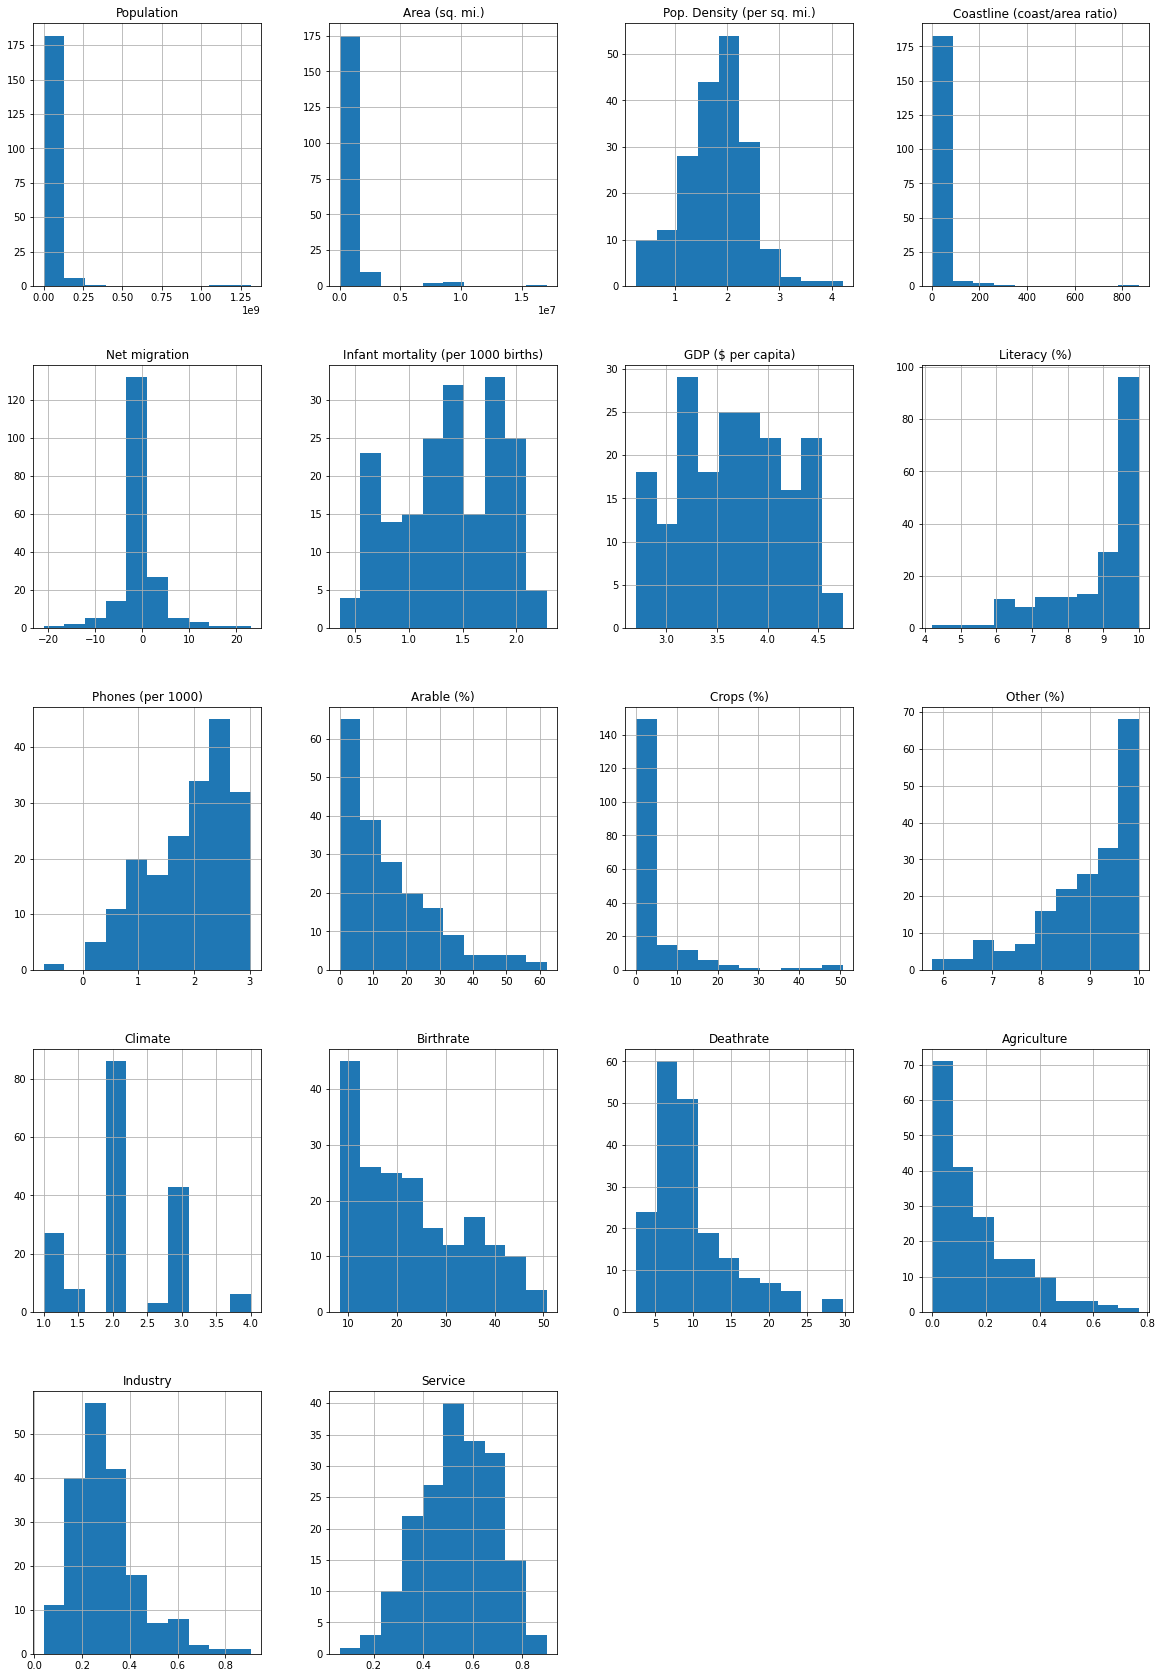

In [17]:
df_filtered.hist(figsize=(20,30))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

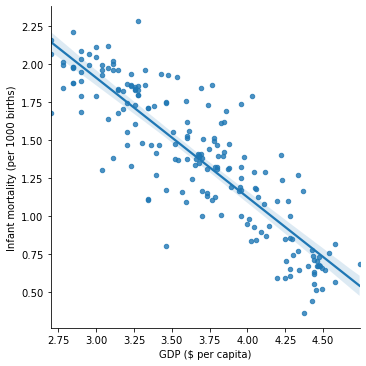

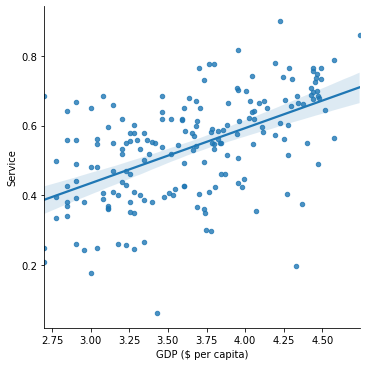

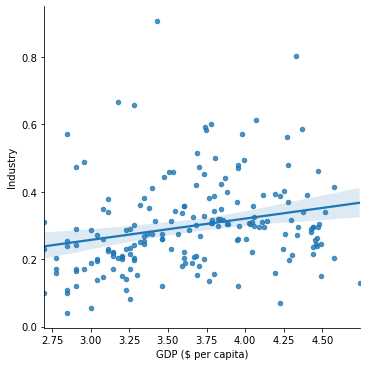

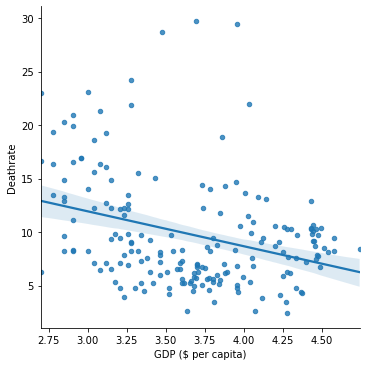

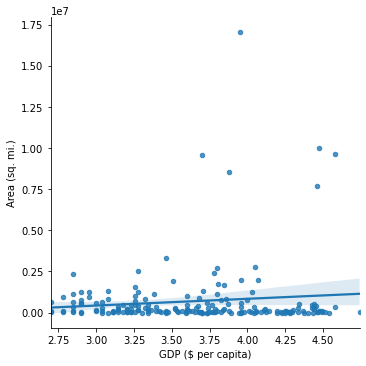

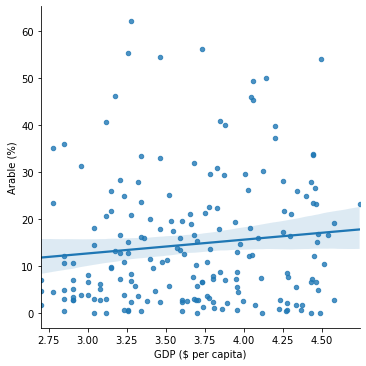

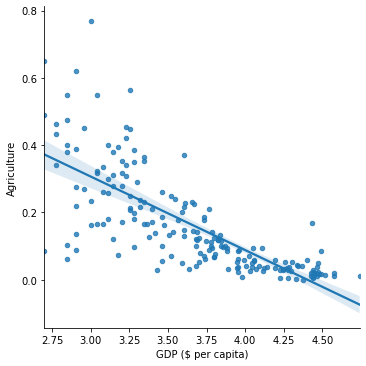

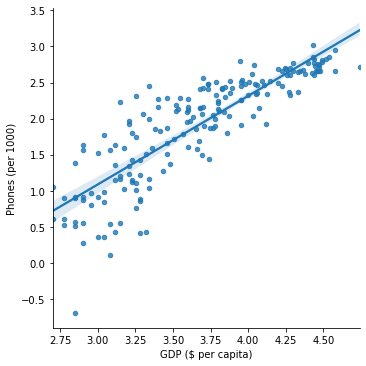

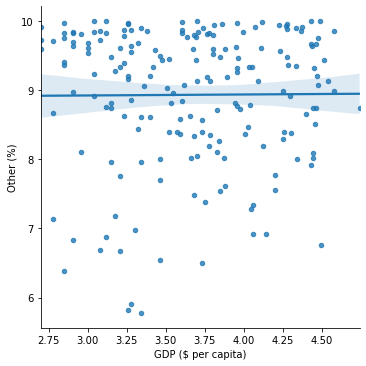

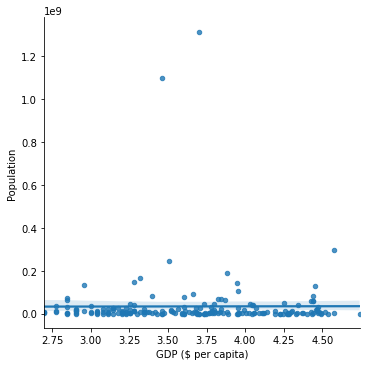

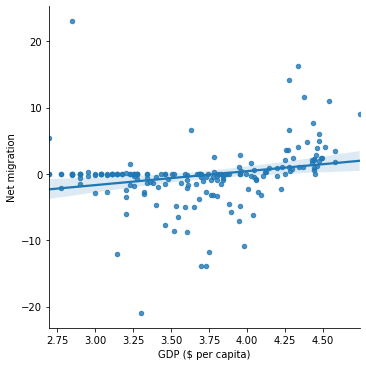

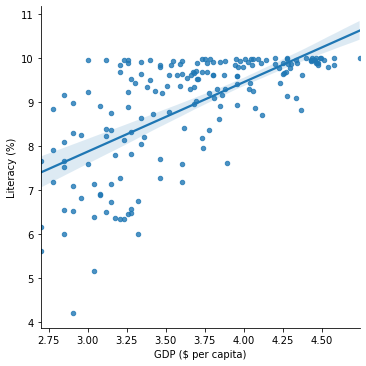

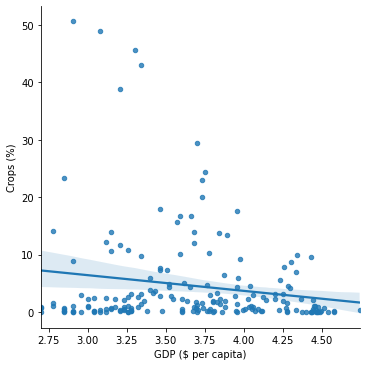

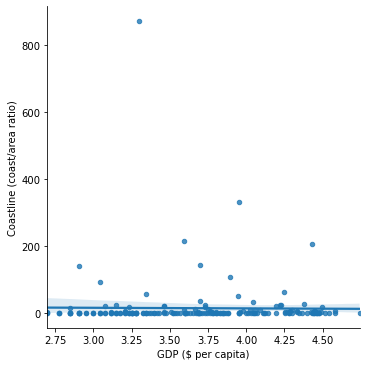

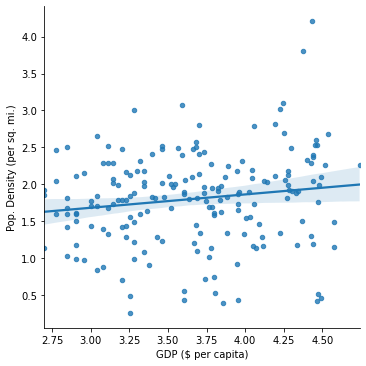

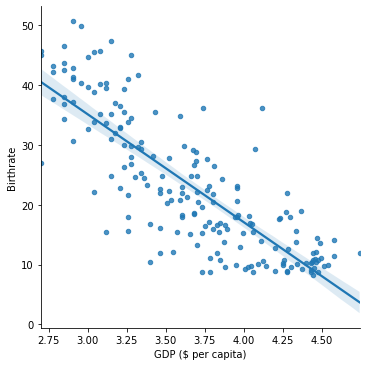

In [18]:
for n in num:
    sns.lmplot('GDP ($ per capita)', n, data=df_filtered, fit_reg=True, scatter_kws={"marker": "D", "s": 20})

<AxesSubplot:xlabel='GDP ($ per capita)'>

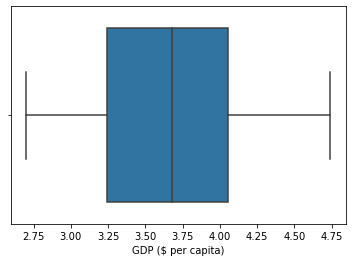

In [19]:
sns.boxplot(x=df_filtered["GDP ($ per capita)"])

In [20]:
df[df['GDP ($ per capita)'] < 2500].count()

Country                               67
Population                            67
Area (sq. mi.)                        67
Pop. Density (per sq. mi.)            67
Coastline (coast/area ratio)          67
Net migration                         67
Infant mortality (per 1000 births)    67
GDP ($ per capita)                    67
Literacy (%)                          64
Phones (per 1000)                     66
Arable (%)                            67
Crops (%)                             67
Other (%)                             67
Climate                               62
Birthrate                             66
Deathrate                             66
Agriculture                           67
Industry                              67
Service                               67
dtype: int64

In [21]:
# df_filtered['GDP ($ per capita)'] = df[df['GDP ($ per capita)'] < 2500].loc[:, 'GDP ($ per capita)']

<AxesSubplot:ylabel='Frequency'>

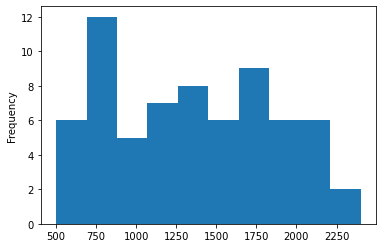

In [22]:
df[df['GDP ($ per capita)'] < 2500].loc[:, 'GDP ($ per capita)'].plot.hist()

In [23]:
df_test = df_filtered.copy()

class_values = sorted(df_test["Country"].unique())
print(len(class_values))
class_idx = {name: id for id, name in enumerate(class_values)}
df_test["Country ID"] = df_test["Country"].apply(lambda name: class_idx[name])
df_test.head().T

191


,0,1,2,4,5
Country,Afghanistan,Albania,Algeria,Andorra,Angola
Population,31056997,3581655,32930091,71201,12127071
Area (sq. mi.),647500,28748,2381740,468,1246700
Pop. Density (per sq. mi.),1.68124,2.09552,1.13988,2.18213,0.986772
Coastline (coast/area ratio),0,1.26,0.04,0,0.13
Net migration,23.06,-4.93,-0.39,6.6,0
Infant mortality (per 1000 births),2.21237,1.33284,1.49136,0.607455,2.28147
GDP ($ per capita),2.8451,3.65321,3.77815,4.27875,3.27875
Literacy (%),6,9.30054,8.3666,10,6.48074
Phones (per 1000),0.50515,1.85248,1.89265,2.69653,0.892095


In [24]:
# df.isna().sum()
df_test=df_test.dropna()   ### Só para testar por enquanto


In [25]:
df_test.shape

(163, 20)

In [26]:
# ###### Pré processamento inicial (para testar o tutorial)

# df_test["Has coastline"] = df_test['Coastline (coast/area ratio)'].apply(lambda x: 0 if x == 0 else 1)

# ##### Pra esses 3 poderia pegar o maior para cada país
# # df_test["Industrial"] = df_test['Industry'].apply(lambda x: 0 if x <0.16 else 1)
# # df_test["Agricultural"] = df_test['Agriculture'].apply(lambda x: 0 if x <0.3 else 1)
# # df_test["Services"] = df_test['Service'].apply(lambda x: 0 if x <0.5 else 1)

# # df_test['Industrial']=0
# # df_test['Agricultural']=0
# # df_test['Services']=0

# df_test['Industrial'] = np.where((df_test['Agriculture'] <= df_test['Industry']) & (df_test['Service'] <= df_test['Industry']), 1,0)
# df_test['Agricultural'] = np.where((df_test['Industry'] <= df_test['Agriculture']) & (df_test['Service'] <= df_test['Agriculture']), 1,0)
# df_test['Services'] = np.where((df_test['Agriculture'] <= df_test['Service']) & (df_test['Industry'] <= df_test['Service']), 1,0)


# df_test["High Literacy"] = df_test['Literacy (%)'].apply(lambda x: 0 if x <0.9 else 1)

# ## Usar OneHotEncoder para as Climate

# # est = KBinsDiscretizer(n_bins=4, encode='ordinal', 
# #                        strategy='quantile')
# # df_test['GDP'] = est.fit_transform(df_test[['GDP ($ per capita)'])


df_test['GDP'] =df_test['GDP ($ per capita)']

#### Mudar essa classificacao para https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021

# df_test['POP_1'] = df_test['Population'].apply(lambda x: 0 if x == 0 else 1)
# df_test['POP_2']
# df_test['POP_3']
# df_test['POP_4']




df_test.drop(['GDP ($ per capita)'], axis=1, inplace=True)
df_test.T


,0,1,2,7,8,9,11,12,13,14,...,213,214,215,216,217,218,219,224,225,226
Country,Afghanistan,Albania,Algeria,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Population,31056997,3581655,32930091,69108,39921833,2976372,20264082,8192880,7961619,303770,...,60609153,298444215,3431932,27307134,208869,25730435,84402966,21456188,11502010,12236805
Area (sq. mi.),647500,28748,2381740,443,2766890,29800,7686850,83870,86600,13940,...,244820,9631420,176220,447400,12200,912050,329560,527970,752614,390580
Pop. Density (per sq. mi.),1.68124,2.09552,1.13988,2.19312,1.15836,1.99957,0.414973,1.98989,1.96332,1.33846,...,2.39375,1.49136,1.29003,1.78533,1.233,1.45025,2.40841,1.60853,1.18469,1.49554
Coastline (coast/area ratio),0,1.26,0.04,34.54,0.18,0,0.34,0,0,25.41,...,5.08,0.21,0.37,0,20.72,0.31,1.05,0.36,0,0
Net migration,23.06,-4.93,-0.39,-6.15,0.61,-6.47,3.98,2,-4.9,-2.2,...,2.19,3.41,-0.32,-1.72,0,-0.04,-0.45,0,0,0
Infant mortality (per 1000 births),2.21237,1.33284,1.49136,1.28914,1.18127,1.36698,0.671173,0.668386,1.91243,1.40157,...,0.71265,0.812913,1.07737,1.85187,1.74162,1.34635,1.41414,1.78888,1.94591,1.83052
Literacy (%),6,9.30054,8.3666,9.43398,9.85393,9.92975,10,9.89949,9.84886,9.77753,...,9.94987,9.84886,9.89949,9.96494,7.28011,9.66437,9.50263,7.0852,8.97775,9.52365
Phones (per 1000),0.50515,1.85248,1.89265,2.74028,2.34321,2.29159,2.75243,2.65533,2.13704,2.66332,...,2.7352,2.95328,2.46449,1.79865,1.51322,2.14644,2.27346,1.57054,0.913814,1.42813
Arable (%),12.13,21.09,3.22,18.18,12.31,17.55,6.55,16.91,19.63,0.8,...,23.46,19.13,7.43,10.83,2.46,2.95,19.97,2.78,7.08,8.32


In [27]:
df.Population.describe()

count    1.910000e+02
mean     3.393533e+07
std      1.278974e+08
min      1.181000e+04
25%      1.640698e+06
50%      7.320815e+06
75%      2.235656e+07
max      1.313974e+09
Name: Population, dtype: float64

In [28]:
df_test.GDP


0      2.845098
1      3.653213
2      3.778151
7      4.041393
8      4.049218
         ...   
218    3.681241
219    3.397940
224    2.903090
225    2.903090
226    3.278754
Name: GDP, Length: 163, dtype: float64

In [29]:
existing_countries = df_test.Country.to_list()

In [30]:
edges = []
# src=[]
# tar=[]
for n in jdict['links']:
    if (n['source'] in existing_countries) and (n['target'] in existing_countries):
#         if n['source'] not in src:
#             src.append(n['source'])
            
#         if n['target'] not in tar:
#             tar.append(n['target'])
        edges.append((n['source'], n['target']))
df_edges= pd.DataFrame.from_records(edges, columns =['source', 'target'])
df_edges.head(5).T



,0,1,2,3,4
source,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
target,People's Republic of China,Iran,Pakistan,Tajikistan,Turkmenistan


In [31]:
df_edges.shape

(226, 2)

#### Visualizando como um grafo

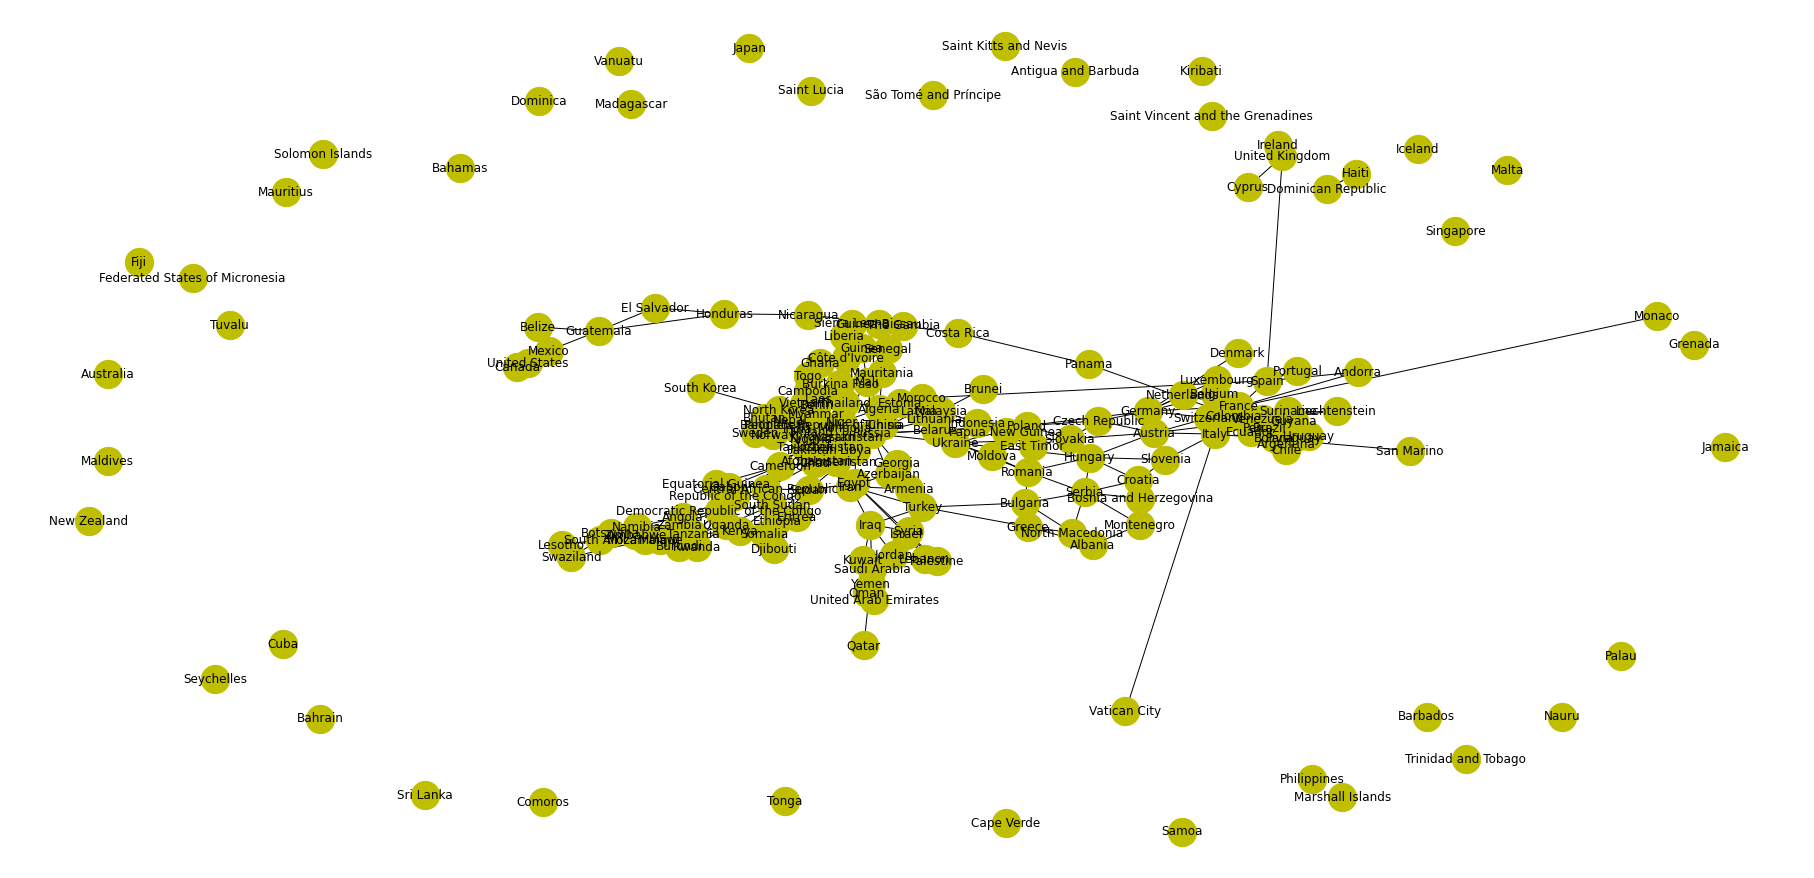

In [32]:
G = nx.Graph()
G.add_nodes_from([node['name'] for node in jdict['nodes']])
G.add_weighted_edges_from([(edge['source'], edge['target'], edge['border'])
                  for edge in jdict['links']])

pos = nx.spring_layout(G, k=.6)
plt.figure(figsize=(25,12))
nx.draw(G, 
        pos=pos,
        node_size=800, 
        with_labels=True, 
        node_color='y')
plt.show()
# plt.savefig("graph.png", dpi=1000)

#### Transformando os nodes em valores numéricos

In [33]:
class_values = sorted(df_test["Country"].unique())
print(len(class_values))
class_idx = {name: id for id, name in enumerate(class_values)}
df_test["Country ID"] = df_test["Country"].apply(lambda name: class_idx[name])
df_test.head().T


163


,0,1,2,7,8
Country,Afghanistan,Albania,Algeria,Antigua and Barbuda,Argentina
Population,31056997,3581655,32930091,69108,39921833
Area (sq. mi.),647500,28748,2381740,443,2766890
Pop. Density (per sq. mi.),1.68124,2.09552,1.13988,2.19312,1.15836
Coastline (coast/area ratio),0,1.26,0.04,34.54,0.18
Net migration,23.06,-4.93,-0.39,-6.15,0.61
Infant mortality (per 1000 births),2.21237,1.33284,1.49136,1.28914,1.18127
Literacy (%),6,9.30054,8.3666,9.43398,9.85393
Phones (per 1000),0.50515,1.85248,1.89265,2.74028,2.34321
Arable (%),12.13,21.09,3.22,18.18,12.31


In [34]:
df_edges["source"] = df_edges["source"].apply(lambda name: class_idx[name])
df_edges["target"] = df_edges["target"].apply(lambda name: class_idx[name])

In [35]:
df_edges.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
source,0,0,0,0,0,0,1,2,2,2,2,4,4,4,4,4,5,5,5,5
target,111,69,106,141,149,156,57,89,91,101,147,18,20,30,110,155,8,54,69,148


# Montando o classificador
https://keras.io/examples/graph/gnn_citations/


In [36]:
feature_names = set(df_test.columns) - {"Country", "GDP", 'Country ID'}
num_features = len(feature_names)
num_classes = num_features
print(num_features, num_classes)

17 17


### Separando treino e teste

In [37]:
df_test.T

,0,1,2,7,8,9,11,12,13,14,...,213,214,215,216,217,218,219,224,225,226
Country,Afghanistan,Albania,Algeria,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Population,31056997,3581655,32930091,69108,39921833,2976372,20264082,8192880,7961619,303770,...,60609153,298444215,3431932,27307134,208869,25730435,84402966,21456188,11502010,12236805
Area (sq. mi.),647500,28748,2381740,443,2766890,29800,7686850,83870,86600,13940,...,244820,9631420,176220,447400,12200,912050,329560,527970,752614,390580
Pop. Density (per sq. mi.),1.68124,2.09552,1.13988,2.19312,1.15836,1.99957,0.414973,1.98989,1.96332,1.33846,...,2.39375,1.49136,1.29003,1.78533,1.233,1.45025,2.40841,1.60853,1.18469,1.49554
Coastline (coast/area ratio),0,1.26,0.04,34.54,0.18,0,0.34,0,0,25.41,...,5.08,0.21,0.37,0,20.72,0.31,1.05,0.36,0,0
Net migration,23.06,-4.93,-0.39,-6.15,0.61,-6.47,3.98,2,-4.9,-2.2,...,2.19,3.41,-0.32,-1.72,0,-0.04,-0.45,0,0,0
Infant mortality (per 1000 births),2.21237,1.33284,1.49136,1.28914,1.18127,1.36698,0.671173,0.668386,1.91243,1.40157,...,0.71265,0.812913,1.07737,1.85187,1.74162,1.34635,1.41414,1.78888,1.94591,1.83052
Literacy (%),6,9.30054,8.3666,9.43398,9.85393,9.92975,10,9.89949,9.84886,9.77753,...,9.94987,9.84886,9.89949,9.96494,7.28011,9.66437,9.50263,7.0852,8.97775,9.52365
Phones (per 1000),0.50515,1.85248,1.89265,2.74028,2.34321,2.29159,2.75243,2.65533,2.13704,2.66332,...,2.7352,2.95328,2.46449,1.79865,1.51322,2.14644,2.27346,1.57054,0.913814,1.42813
Arable (%),12.13,21.09,3.22,18.18,12.31,17.55,6.55,16.91,19.63,0.8,...,23.46,19.13,7.43,10.83,2.46,2.95,19.97,2.78,7.08,8.32


In [38]:
df_test.GDP.describe()

count    163.000000
mean       3.644468
std        0.505301
min        2.698970
25%        3.230449
50%        3.662758
75%        4.035388
max        4.577492
Name: GDP, dtype: float64

In [39]:
train_data, test_data = [], []

for _, group_data in df_test.groupby("GDP"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.15
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (23, 20)
Test data shape: (140, 20)


In [40]:
# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["GDP"]
y_test = test_data["GDP"]

In [41]:
x_train.shape

(23, 17)

In [42]:
def model_predict(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    train_pred_Y = model.predict(x_train)
    test_pred_Y = model.predict(x_test)
    train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
    test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)


    rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
    msle_train = mean_squared_log_error(train_pred_Y, y_train)
    rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
    msle_test = mean_squared_log_error(test_pred_Y, y_test)

    print('rmse_train:',rmse_train,'msle_train:',msle_train)
    print('rmse_test:',rmse_test,'msle_test:',msle_test)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = LinearRegression()
model_predict(model, x_train, y_train, x_test, y_test)

rmse_train: 0.05956811557891379 msle_train: 0.00014530313741051084
rmse_test: 0.8236787076485187 msle_test: 0.01748187970731545


In [45]:
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)

model_predict(model, x_train, y_train, x_test, y_test)

rmse_train: 0.07011307902720113 msle_train: 0.0002059972878646595
rmse_test: 0.23936519261384243 msle_test: 0.0028834305958911044


In [46]:
feature_importances = (list(zip(model.feature_importances_,feature_names)))

In [47]:
sorted(feature_importances, key=lambda x: x[0], reverse=True)

[(0.20074281994086665, 'Infant mortality (per 1000 births)'),
 (0.19831124805482114, 'Birthrate'),
 (0.18129072030763757, 'Literacy (%)'),
 (0.15500794340479973, 'Agriculture'),
 (0.13513289278913895, 'Phones (per 1000)'),
 (0.09084913288552506, 'Net migration'),
 (0.008657549173355632, 'Arable (%)'),
 (0.004813443047736084, 'Service'),
 (0.004622855296678381, 'Area (sq. mi.)'),
 (0.003394143542606895, 'Deathrate'),
 (0.0030895132250814148, 'Pop. Density (per sq. mi.)'),
 (0.0028929770544542876, 'Crops (%)'),
 (0.0027300242756434483, 'Population'),
 (0.0025591175967724735, 'Other (%)'),
 (0.002343928877150466, 'Climate'),
 (0.0018944568259767723, 'Industry'),
 (0.0016672337017551294, 'Coastline (coast/area ratio)')]

In [48]:
model = DecisionTreeRegressor(max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)

model_predict(model, x_train, y_train, x_test, y_test)

rmse_train: 0.03878584022544632 msle_train: 6.544771064737843e-05
rmse_test: 0.31488869046619755 msle_test: 0.004886720274814034


### Testando um modelo baseline 
(Ainda não leva em consideração as conexões do grafo)

In [49]:
##  Feedforward Network (FFN) Module
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [50]:
def create_simple_model(num_classes):
    model = keras.Sequential([
        layers.Dense(1, input_shape=[num_classes]),
        #layers.Dense(5, activation='selu', input_shape=[5]),
        #layers.Dense(1),
    ])
    return model
    
baseline_model = create_simple_model(num_classes)

In [51]:
def create_simple_model(num_classes, dropout_rate):
    model = keras.Sequential([
    layers.GaussianNoise(0.2, input_shape=[num_classes]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(1)
  ])
    return model
    
baseline_model = create_simple_model(num_classes, 0.2)

In [52]:
def run_experiment(model, x_train, y_train):
    model.compile(
        optimizer=keras.optimizers.Adam(1e-1),
        loss='mse',
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=2000,
        batch_size=2048,
        validation_split=0.3,
    )

    return history

In [53]:
def display_learning_curves(history):
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))

    ax1.plot(history.history["loss"][50:])
    ax1.plot(history.history["val_loss"][50:])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    plt.show()

In [54]:
# def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
#     inputs = layers.Input(shape=(num_features,), name="input_features")
#     x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
#     for block_idx in range(4):
#         # Create an FFN block.
#         x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
#         # Add skip connection.
#         x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
#     # Compute logits.
#     logits = layers.Dense(num_classes, name="logits")(x)
#     # Create the model.
#     return keras.Model(inputs=inputs, outputs=logits, name="baseline")


# baseline_model = create_baseline_model( [32, 32], num_classes,  0.2)
# baseline_model.summary()

In [55]:
# baseline_model = RandomForestRegressor(n_estimators = 50,
#                              max_depth = 6,
#                              min_weight_fraction_leaf = 0.05,
#                              max_features = 0.8,
#                              random_state = 42)

In [56]:
# baseline_model = create_ffn([32,32],0.2)

In [57]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/2000
1/1 [==============================] - 1s 575ms/step - loss: 3336702787584.0000 - val_loss: 20217957250498560.0000
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 19779292913205248.0000 - val_loss: 848201449472.0000
Epoch 3/2000
1/1 [==============================] - 0s 31ms/step - loss: 8550364479488.0000 - val_loss: 11038214848512.0000
Epoch 4/2000
1/1 [==============================] - 0s 26ms/step - loss: 12111594913792.0000 - val_loss: 246437134336.0000
Epoch 5/2000
1/1 [==============================] - 0s 25ms/step - loss: 194756493312.0000 - val_loss: 10239983222784.0000
Epoch 6/2000
1/1 [==============================] - 0s 25ms/step - loss: 5356647350272.0000 - val_loss: 350604096.0000
Epoch 7/2000
1/1 [==============================] - 0s 27ms/step - loss: 444564471808.0000 - val_loss: 19363631104.0000
Epoch 8/2000
1/1 [==============================] - 0s 26ms/step - loss: 149881241600.0000 - val_loss: 331018502144.0000
Epoch 9/2000
1/1

1/1 [==============================] - 0s 25ms/step - loss: 59935212.0000 - val_loss: 26450022.0000
Epoch 71/2000
1/1 [==============================] - 0s 26ms/step - loss: 51013040.0000 - val_loss: 23180986.0000
Epoch 72/2000
1/1 [==============================] - 0s 27ms/step - loss: 27236800.0000 - val_loss: 20098652.0000
Epoch 73/2000
1/1 [==============================] - 0s 28ms/step - loss: 41066920.0000 - val_loss: 17028778.0000
Epoch 74/2000
1/1 [==============================] - 0s 28ms/step - loss: 33087104.0000 - val_loss: 14096973.0000
Epoch 75/2000
1/1 [==============================] - 0s 26ms/step - loss: 19226344.0000 - val_loss: 11470733.0000
Epoch 76/2000
1/1 [==============================] - 0s 26ms/step - loss: 21791812.0000 - val_loss: 9087399.0000
Epoch 77/2000
1/1 [==============================] - 0s 28ms/step - loss: 17517534.0000 - val_loss: 6979703.0000
Epoch 78/2000
1/1 [==============================] - 0s 25ms/step - loss: 13085794.0000 - val_loss: 5172

1/1 [==============================] - 0s 26ms/step - loss: 36300.8516 - val_loss: 16111.6963
Epoch 145/2000
1/1 [==============================] - 0s 25ms/step - loss: 15984.9336 - val_loss: 13363.8066
Epoch 146/2000
1/1 [==============================] - 0s 28ms/step - loss: 15511.1641 - val_loss: 10865.5830
Epoch 147/2000
1/1 [==============================] - 0s 28ms/step - loss: 11218.6992 - val_loss: 8660.9004
Epoch 148/2000
1/1 [==============================] - 0s 25ms/step - loss: 10820.2969 - val_loss: 6721.6553
Epoch 149/2000
1/1 [==============================] - 0s 27ms/step - loss: 8887.4502 - val_loss: 5049.4873
Epoch 150/2000
1/1 [==============================] - 0s 29ms/step - loss: 10024.0303 - val_loss: 3598.4790
Epoch 151/2000
1/1 [==============================] - 0s 28ms/step - loss: 3615.3228 - val_loss: 2447.7761
Epoch 152/2000
1/1 [==============================] - 0s 27ms/step - loss: 4576.4800 - val_loss: 1536.1471
Epoch 153/2000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 6.9429 - val_loss: 14.9874
Epoch 223/2000
1/1 [==============================] - 0s 28ms/step - loss: 13.4495 - val_loss: 15.1105
Epoch 224/2000
1/1 [==============================] - 0s 27ms/step - loss: 11.8524 - val_loss: 15.1892
Epoch 225/2000
1/1 [==============================] - 0s 27ms/step - loss: 12.0684 - val_loss: 15.2237
Epoch 226/2000
1/1 [==============================] - 0s 27ms/step - loss: 13.4561 - val_loss: 15.1875
Epoch 227/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.4649 - val_loss: 15.1328
Epoch 228/2000
1/1 [==============================] - 0s 28ms/step - loss: 12.0696 - val_loss: 15.0210
Epoch 229/2000
1/1 [==============================] - 0s 30ms/step - loss: 12.8578 - val_loss: 14.8700
Epoch 230/2000
1/1 [==============================] - 0s 26ms/step - loss: 11.7899 - val_loss: 14.6983
Epoch 231/2000
1/1 [==============================] - 0s 27ms/step - loss: 11.3683 - val_l

Epoch 302/2000
1/1 [==============================] - 0s 26ms/step - loss: 8.9601 - val_loss: 14.0793
Epoch 303/2000
1/1 [==============================] - 0s 26ms/step - loss: 6.8610 - val_loss: 14.0778
Epoch 304/2000
1/1 [==============================] - 0s 24ms/step - loss: 11.5166 - val_loss: 14.0804
Epoch 305/2000
1/1 [==============================] - 0s 24ms/step - loss: 9.2018 - val_loss: 14.0843
Epoch 306/2000
1/1 [==============================] - 0s 26ms/step - loss: 11.9046 - val_loss: 14.0914
Epoch 307/2000
1/1 [==============================] - 0s 24ms/step - loss: 10.4645 - val_loss: 14.0933
Epoch 308/2000
1/1 [==============================] - 0s 26ms/step - loss: 7.9719 - val_loss: 14.0966
Epoch 309/2000
1/1 [==============================] - 0s 25ms/step - loss: 9.7940 - val_loss: 14.0996
Epoch 310/2000
1/1 [==============================] - 0s 26ms/step - loss: 7.1684 - val_loss: 14.1022
Epoch 311/2000
1/1 [==============================] - 0s 32ms/step - loss: 11.7

Epoch 382/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.2425 - val_loss: 14.0930
Epoch 383/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.5020 - val_loss: 14.1136
Epoch 384/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.4620 - val_loss: 14.1295
Epoch 385/2000
1/1 [==============================] - 0s 25ms/step - loss: 12.3189 - val_loss: 14.1365
Epoch 386/2000
1/1 [==============================] - 0s 28ms/step - loss: 7.7943 - val_loss: 14.1453
Epoch 387/2000
1/1 [==============================] - 0s 24ms/step - loss: 11.5887 - val_loss: 14.1548
Epoch 388/2000
1/1 [==============================] - 0s 25ms/step - loss: 8.5408 - val_loss: 14.1547
Epoch 389/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.8142 - val_loss: 14.1544
Epoch 390/2000
1/1 [==============================] - 0s 25ms/step - loss: 9.4767 - val_loss: 14.1546
Epoch 391/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.6

Epoch 462/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.7743 - val_loss: 14.1229
Epoch 463/2000
1/1 [==============================] - 0s 25ms/step - loss: 11.2938 - val_loss: 14.1269
Epoch 464/2000
1/1 [==============================] - 0s 24ms/step - loss: 8.5551 - val_loss: 14.1335
Epoch 465/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.7602 - val_loss: 14.1354
Epoch 466/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.4402 - val_loss: 14.1380
Epoch 467/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.9221 - val_loss: 14.1434
Epoch 468/2000
1/1 [==============================] - 0s 30ms/step - loss: 11.2150 - val_loss: 14.1407
Epoch 469/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.8805 - val_loss: 14.1408
Epoch 470/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.6816 - val_loss: 14.1392
Epoch 471/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.6

Epoch 542/2000
1/1 [==============================] - 0s 26ms/step - loss: 8.6674 - val_loss: 14.0712
Epoch 543/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.7161 - val_loss: 14.0685
Epoch 544/2000
1/1 [==============================] - 0s 26ms/step - loss: 6.9702 - val_loss: 14.0672
Epoch 545/2000
1/1 [==============================] - 0s 24ms/step - loss: 9.0132 - val_loss: 14.0689
Epoch 546/2000
1/1 [==============================] - 0s 26ms/step - loss: 13.1369 - val_loss: 14.0720
Epoch 547/2000
1/1 [==============================] - 0s 26ms/step - loss: 11.7263 - val_loss: 14.0675
Epoch 548/2000
1/1 [==============================] - 0s 24ms/step - loss: 12.0496 - val_loss: 14.0698
Epoch 549/2000
1/1 [==============================] - 0s 23ms/step - loss: 8.6407 - val_loss: 14.0717
Epoch 550/2000
1/1 [==============================] - 0s 31ms/step - loss: 7.5468 - val_loss: 14.0769
Epoch 551/2000
1/1 [==============================] - 0s 26ms/step - loss: 10.9

Epoch 622/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.6547 - val_loss: 14.1979
Epoch 623/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.7748 - val_loss: 14.2033
Epoch 624/2000
1/1 [==============================] - 0s 26ms/step - loss: 12.7776 - val_loss: 14.2146
Epoch 625/2000
1/1 [==============================] - 0s 25ms/step - loss: 11.2549 - val_loss: 14.2258
Epoch 626/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.1802 - val_loss: 14.2345
Epoch 627/2000
1/1 [==============================] - 0s 29ms/step - loss: 9.8218 - val_loss: 14.2412
Epoch 628/2000
1/1 [==============================] - 0s 31ms/step - loss: 13.2774 - val_loss: 14.2455
Epoch 629/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.8911 - val_loss: 14.2473
Epoch 630/2000
1/1 [==============================] - 0s 30ms/step - loss: 10.7229 - val_loss: 14.2433
Epoch 631/2000
1/1 [==============================] - 0s 27ms/step - loss: 9

Epoch 702/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.5726 - val_loss: 14.0230
Epoch 703/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.5473 - val_loss: 14.0227
Epoch 704/2000
1/1 [==============================] - 0s 25ms/step - loss: 9.6768 - val_loss: 14.0210
Epoch 705/2000
1/1 [==============================] - 0s 25ms/step - loss: 7.9511 - val_loss: 14.0232
Epoch 706/2000
1/1 [==============================] - 0s 23ms/step - loss: 5.6289 - val_loss: 14.0283
Epoch 707/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.2603 - val_loss: 14.0326
Epoch 708/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.5613 - val_loss: 14.0395
Epoch 709/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.4975 - val_loss: 14.0526
Epoch 710/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.0239 - val_loss: 14.0728
Epoch 711/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.96

Epoch 782/2000
1/1 [==============================] - 0s 29ms/step - loss: 8.4610 - val_loss: 14.0507
Epoch 783/2000
1/1 [==============================] - 0s 26ms/step - loss: 10.0370 - val_loss: 14.0608
Epoch 784/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.1332 - val_loss: 14.0749
Epoch 785/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.8751 - val_loss: 14.0820
Epoch 786/2000
1/1 [==============================] - 0s 30ms/step - loss: 9.4735 - val_loss: 14.0811
Epoch 787/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.7687 - val_loss: 14.0753
Epoch 788/2000
1/1 [==============================] - 0s 26ms/step - loss: 11.6291 - val_loss: 14.0724
Epoch 789/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.7569 - val_loss: 14.0658
Epoch 790/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.7270 - val_loss: 14.0630
Epoch 791/2000
1/1 [==============================] - 0s 30ms/step - loss: 8.07

Epoch 862/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.6253 - val_loss: 14.0590
Epoch 863/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.9869 - val_loss: 14.0656
Epoch 864/2000
1/1 [==============================] - 0s 30ms/step - loss: 7.0535 - val_loss: 14.0819
Epoch 865/2000
1/1 [==============================] - 0s 29ms/step - loss: 10.3784 - val_loss: 14.0927
Epoch 866/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.6179 - val_loss: 14.0953
Epoch 867/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.7857 - val_loss: 14.1023
Epoch 868/2000
1/1 [==============================] - 0s 26ms/step - loss: 8.6680 - val_loss: 14.1143
Epoch 869/2000
1/1 [==============================] - 0s 28ms/step - loss: 7.0864 - val_loss: 14.1214
Epoch 870/2000
1/1 [==============================] - 0s 30ms/step - loss: 9.3785 - val_loss: 14.1317
Epoch 871/2000
1/1 [==============================] - 0s 30ms/step - loss: 8.9930

Epoch 942/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.4558 - val_loss: 14.0027
Epoch 943/2000
1/1 [==============================] - 0s 30ms/step - loss: 10.8946 - val_loss: 14.0063
Epoch 944/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.3098 - val_loss: 14.0154
Epoch 945/2000
1/1 [==============================] - 0s 26ms/step - loss: 10.3169 - val_loss: 14.0239
Epoch 946/2000
1/1 [==============================] - 0s 29ms/step - loss: 9.1026 - val_loss: 14.0335
Epoch 947/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.2416 - val_loss: 14.0449
Epoch 948/2000
1/1 [==============================] - 0s 35ms/step - loss: 9.1871 - val_loss: 14.0645
Epoch 949/2000
1/1 [==============================] - 0s 30ms/step - loss: 10.8296 - val_loss: 14.0916
Epoch 950/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.3418 - val_loss: 14.1213
Epoch 951/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.

Epoch 1022/2000
1/1 [==============================] - 0s 32ms/step - loss: 7.4306 - val_loss: 14.0130
Epoch 1023/2000
1/1 [==============================] - 0s 33ms/step - loss: 11.0822 - val_loss: 14.0169
Epoch 1024/2000
1/1 [==============================] - 0s 32ms/step - loss: 8.4450 - val_loss: 14.0260
Epoch 1025/2000
1/1 [==============================] - 0s 36ms/step - loss: 12.1150 - val_loss: 14.0288
Epoch 1026/2000
1/1 [==============================] - 0s 34ms/step - loss: 10.0464 - val_loss: 14.0335
Epoch 1027/2000
1/1 [==============================] - 0s 33ms/step - loss: 10.3644 - val_loss: 14.0374
Epoch 1028/2000
1/1 [==============================] - 0s 34ms/step - loss: 9.6417 - val_loss: 14.0401
Epoch 1029/2000
1/1 [==============================] - 0s 33ms/step - loss: 9.6819 - val_loss: 14.0495
Epoch 1030/2000
1/1 [==============================] - 0s 30ms/step - loss: 9.1525 - val_loss: 14.0603
Epoch 1031/2000
1/1 [==============================] - 0s 32ms/step -

1/1 [==============================] - 0s 35ms/step - loss: 9.3861 - val_loss: 14.1971
Epoch 1102/2000
1/1 [==============================] - 0s 37ms/step - loss: 10.2924 - val_loss: 14.2001
Epoch 1103/2000
1/1 [==============================] - 0s 34ms/step - loss: 11.1732 - val_loss: 14.1994
Epoch 1104/2000
1/1 [==============================] - 0s 31ms/step - loss: 9.3983 - val_loss: 14.2056
Epoch 1105/2000
1/1 [==============================] - 0s 40ms/step - loss: 11.0201 - val_loss: 14.2061
Epoch 1106/2000
1/1 [==============================] - 0s 38ms/step - loss: 11.0228 - val_loss: 14.1886
Epoch 1107/2000
1/1 [==============================] - 0s 31ms/step - loss: 11.3554 - val_loss: 14.1782
Epoch 1108/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.7866 - val_loss: 14.1502
Epoch 1109/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.8096 - val_loss: 14.1343
Epoch 1110/2000
1/1 [==============================] - 0s 37ms/step - loss: 10.024

1/1 [==============================] - 0s 26ms/step - loss: 11.8938 - val_loss: 14.1468
Epoch 1181/2000
1/1 [==============================] - 0s 25ms/step - loss: 8.2785 - val_loss: 14.1514
Epoch 1182/2000
1/1 [==============================] - 0s 29ms/step - loss: 11.5838 - val_loss: 14.1385
Epoch 1183/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.9252 - val_loss: 14.1261
Epoch 1184/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.0509 - val_loss: 14.1069
Epoch 1185/2000
1/1 [==============================] - 0s 31ms/step - loss: 11.0135 - val_loss: 14.0830
Epoch 1186/2000
1/1 [==============================] - 0s 26ms/step - loss: 6.2022 - val_loss: 14.0687
Epoch 1187/2000
1/1 [==============================] - 0s 26ms/step - loss: 11.5009 - val_loss: 14.0472
Epoch 1188/2000
1/1 [==============================] - 0s 29ms/step - loss: 8.6990 - val_loss: 14.0369
Epoch 1189/2000
1/1 [==============================] - 0s 29ms/step - loss: 9.9995 -

1/1 [==============================] - 0s 30ms/step - loss: 12.0117 - val_loss: 14.0244
Epoch 1260/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.2471 - val_loss: 14.0364
Epoch 1261/2000
1/1 [==============================] - 0s 30ms/step - loss: 11.4895 - val_loss: 14.0462
Epoch 1262/2000
1/1 [==============================] - 0s 33ms/step - loss: 9.2352 - val_loss: 14.0619
Epoch 1263/2000
1/1 [==============================] - 0s 32ms/step - loss: 9.9959 - val_loss: 14.0703
Epoch 1264/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.5045 - val_loss: 14.0810
Epoch 1265/2000
1/1 [==============================] - 0s 25ms/step - loss: 11.6196 - val_loss: 14.0836
Epoch 1266/2000
1/1 [==============================] - 0s 30ms/step - loss: 13.2105 - val_loss: 14.0889
Epoch 1267/2000
1/1 [==============================] - 0s 25ms/step - loss: 12.9777 - val_loss: 14.1008
Epoch 1268/2000
1/1 [==============================] - 0s 30ms/step - loss: 9.3789 

1/1 [==============================] - 0s 29ms/step - loss: 6.0702 - val_loss: 14.1219
Epoch 1339/2000
1/1 [==============================] - 0s 24ms/step - loss: 12.0584 - val_loss: 14.1011
Epoch 1340/2000
1/1 [==============================] - 0s 26ms/step - loss: 7.8205 - val_loss: 14.0810
Epoch 1341/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.4603 - val_loss: 14.0694
Epoch 1342/2000
1/1 [==============================] - 0s 26ms/step - loss: 7.0430 - val_loss: 14.0543
Epoch 1343/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.1546 - val_loss: 14.0368
Epoch 1344/2000
1/1 [==============================] - 0s 25ms/step - loss: 10.9207 - val_loss: 14.0300
Epoch 1345/2000
1/1 [==============================] - 0s 33ms/step - loss: 11.4230 - val_loss: 14.0341
Epoch 1346/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.9206 - val_loss: 14.0402
Epoch 1347/2000
1/1 [==============================] - 0s 28ms/step - loss: 11.9843 

1/1 [==============================] - 0s 30ms/step - loss: 11.1972 - val_loss: 14.0925
Epoch 1418/2000
1/1 [==============================] - 0s 27ms/step - loss: 12.1136 - val_loss: 14.0889
Epoch 1419/2000
1/1 [==============================] - 0s 26ms/step - loss: 4.0897 - val_loss: 14.0900
Epoch 1420/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.8430 - val_loss: 14.0840
Epoch 1421/2000
1/1 [==============================] - 0s 34ms/step - loss: 10.6469 - val_loss: 14.0908
Epoch 1422/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.2270 - val_loss: 14.1020
Epoch 1423/2000
1/1 [==============================] - 0s 30ms/step - loss: 8.5590 - val_loss: 14.1249
Epoch 1424/2000
1/1 [==============================] - 0s 33ms/step - loss: 9.9394 - val_loss: 14.1495
Epoch 1425/2000
1/1 [==============================] - 0s 29ms/step - loss: 7.7641 - val_loss: 14.1778
Epoch 1426/2000
1/1 [==============================] - 0s 25ms/step - loss: 10.9549 -

1/1 [==============================] - 0s 28ms/step - loss: 10.9139 - val_loss: 14.0650
Epoch 1497/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.5350 - val_loss: 14.0858
Epoch 1498/2000
1/1 [==============================] - 0s 29ms/step - loss: 8.9380 - val_loss: 14.1155
Epoch 1499/2000
1/1 [==============================] - 0s 23ms/step - loss: 9.9822 - val_loss: 14.1552
Epoch 1500/2000
1/1 [==============================] - 0s 24ms/step - loss: 9.0639 - val_loss: 14.2051
Epoch 1501/2000
1/1 [==============================] - 0s 30ms/step - loss: 8.4064 - val_loss: 14.2472
Epoch 1502/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.3363 - val_loss: 14.2877
Epoch 1503/2000
1/1 [==============================] - 0s 27ms/step - loss: 6.9284 - val_loss: 14.2971
Epoch 1504/2000
1/1 [==============================] - 0s 26ms/step - loss: 10.7988 - val_loss: 14.3238
Epoch 1505/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.2876 - v

1/1 [==============================] - 0s 25ms/step - loss: 10.8802 - val_loss: 14.1024
Epoch 1576/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.5578 - val_loss: 14.1506
Epoch 1577/2000
1/1 [==============================] - 0s 29ms/step - loss: 7.3967 - val_loss: 14.1866
Epoch 1578/2000
1/1 [==============================] - 0s 24ms/step - loss: 8.1463 - val_loss: 14.2189
Epoch 1579/2000
1/1 [==============================] - 0s 28ms/step - loss: 11.3941 - val_loss: 14.2272
Epoch 1580/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.5798 - val_loss: 14.2233
Epoch 1581/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.0515 - val_loss: 14.2065
Epoch 1582/2000
1/1 [==============================] - 0s 33ms/step - loss: 10.0992 - val_loss: 14.1801
Epoch 1583/2000
1/1 [==============================] - 0s 27ms/step - loss: 10.3289 - val_loss: 14.1591
Epoch 1584/2000
1/1 [==============================] - 0s 26ms/step - loss: 10.8596

1/1 [==============================] - 0s 27ms/step - loss: 4.7866 - val_loss: 14.1450
Epoch 1655/2000
1/1 [==============================] - 0s 26ms/step - loss: 11.5107 - val_loss: 14.1702
Epoch 1656/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.3251 - val_loss: 14.2128
Epoch 1657/2000
1/1 [==============================] - 0s 36ms/step - loss: 11.4292 - val_loss: 14.2496
Epoch 1658/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.8773 - val_loss: 14.2848
Epoch 1659/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.5784 - val_loss: 14.3170
Epoch 1660/2000
1/1 [==============================] - 0s 28ms/step - loss: 11.4966 - val_loss: 14.3286
Epoch 1661/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.8712 - val_loss: 14.3163
Epoch 1662/2000
1/1 [==============================] - 0s 28ms/step - loss: 7.8617 - val_loss: 14.3105
Epoch 1663/2000
1/1 [==============================] - 0s 25ms/step - loss: 8.0415 - v

1/1 [==============================] - 0s 28ms/step - loss: 10.1721 - val_loss: 14.0487
Epoch 1734/2000
1/1 [==============================] - 0s 26ms/step - loss: 6.9528 - val_loss: 14.0470
Epoch 1735/2000
1/1 [==============================] - 0s 29ms/step - loss: 10.9369 - val_loss: 14.0506
Epoch 1736/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.6396 - val_loss: 14.0609
Epoch 1737/2000
1/1 [==============================] - 0s 23ms/step - loss: 8.5749 - val_loss: 14.0831
Epoch 1738/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.3505 - val_loss: 14.1071
Epoch 1739/2000
1/1 [==============================] - 0s 27ms/step - loss: 8.2396 - val_loss: 14.1411
Epoch 1740/2000
1/1 [==============================] - 0s 26ms/step - loss: 9.8136 - val_loss: 14.1569
Epoch 1741/2000
1/1 [==============================] - 0s 28ms/step - loss: 12.6194 - val_loss: 14.1442
Epoch 1742/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.8605 - 

1/1 [==============================] - 0s 34ms/step - loss: 11.0749 - val_loss: 14.3617
Epoch 1813/2000
1/1 [==============================] - 0s 32ms/step - loss: 10.2315 - val_loss: 14.3636
Epoch 1814/2000
1/1 [==============================] - 0s 28ms/step - loss: 8.8511 - val_loss: 14.3401
Epoch 1815/2000
1/1 [==============================] - 0s 26ms/step - loss: 12.4106 - val_loss: 14.2904
Epoch 1816/2000
1/1 [==============================] - 0s 27ms/step - loss: 11.6629 - val_loss: 14.2528
Epoch 1817/2000
1/1 [==============================] - 0s 26ms/step - loss: 12.3780 - val_loss: 14.2088
Epoch 1818/2000
1/1 [==============================] - 0s 28ms/step - loss: 10.3810 - val_loss: 14.1482
Epoch 1819/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.3052 - val_loss: 14.1179
Epoch 1820/2000
1/1 [==============================] - 0s 30ms/step - loss: 9.8678 - val_loss: 14.0935
Epoch 1821/2000
1/1 [==============================] - 0s 29ms/step - loss: 9.6151 

1/1 [==============================] - 0s 28ms/step - loss: 11.0500 - val_loss: 14.0730
Epoch 1892/2000
1/1 [==============================] - 0s 32ms/step - loss: 8.9725 - val_loss: 14.0386
Epoch 1893/2000
1/1 [==============================] - 0s 33ms/step - loss: 12.0912 - val_loss: 14.0098
Epoch 1894/2000
1/1 [==============================] - 0s 25ms/step - loss: 9.3218 - val_loss: 13.9992
Epoch 1895/2000
1/1 [==============================] - 0s 29ms/step - loss: 8.9825 - val_loss: 14.0008
Epoch 1896/2000
1/1 [==============================] - 0s 29ms/step - loss: 10.7147 - val_loss: 14.0011
Epoch 1897/2000
1/1 [==============================] - 0s 26ms/step - loss: 13.5966 - val_loss: 13.9993
Epoch 1898/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.0372 - val_loss: 14.0093
Epoch 1899/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.9428 - val_loss: 14.0437
Epoch 1900/2000
1/1 [==============================] - 0s 27ms/step - loss: 9.3990 - 

1/1 [==============================] - 0s 32ms/step - loss: 7.3307 - val_loss: 14.0570
Epoch 1971/2000
1/1 [==============================] - 0s 31ms/step - loss: 8.4174 - val_loss: 14.0703
Epoch 1972/2000
1/1 [==============================] - 0s 31ms/step - loss: 10.4608 - val_loss: 14.0877
Epoch 1973/2000
1/1 [==============================] - 0s 28ms/step - loss: 14.0907 - val_loss: 14.0854
Epoch 1974/2000
1/1 [==============================] - 0s 31ms/step - loss: 8.3294 - val_loss: 14.0918
Epoch 1975/2000
1/1 [==============================] - 0s 28ms/step - loss: 9.6939 - val_loss: 14.0859
Epoch 1976/2000
1/1 [==============================] - 0s 30ms/step - loss: 7.8951 - val_loss: 14.0735
Epoch 1977/2000
1/1 [==============================] - 0s 34ms/step - loss: 11.4486 - val_loss: 14.0641
Epoch 1978/2000
1/1 [==============================] - 0s 35ms/step - loss: 9.5646 - val_loss: 14.0455
Epoch 1979/2000
1/1 [==============================] - 0s 33ms/step - loss: 9.2942 - v

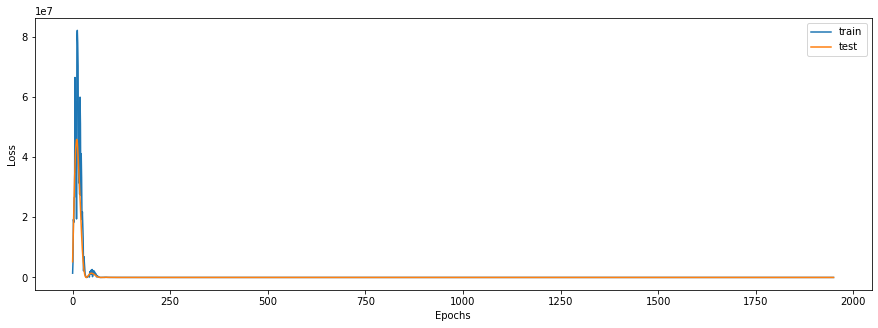

In [58]:
display_learning_curves(history)

In [59]:
original_mse = np.sqrt(baseline_model.evaluate(x=x_test, y=y_test, verbose=0))
# print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")
# test_accuracy

In [60]:
original_mse

8.809002121215661

In [61]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
1995,11.104553,14.164378,1995
1996,8.236525,14.164953,1996
1997,7.627657,14.172983,1997
1998,11.698240,14.197214,1998
1999,11.345063,14.195573,1999


In [62]:
list(zip(baseline_model(x_test).numpy()[:,0], y_test))

[(-0.33587384, 3.230448921378274),
 (-0.2566922, 3.5440680443502757),
 (3.107172, 4.442479769064448),
 (-0.23965932, 3.7993405494535817),
 (0.41392428, 2.9030899869919438),
 (0.07204211, 3.113943352306837),
 (-0.27336723, 4.365487984890899),
 (9.262788, 3.322219294733919),
 (-0.0968152, 3.361727836017593),
 (-0.016354471, 3.6720978579357175),
 (-0.3451099, 2.9030899869919438),
 (3.3659139, 3.8692317197309762),
 (1.4621755, 4.4623979978989565),
 (0.23865455, 3.462397997898956),
 (0.15318614, 3.322219294733919),
 (11.281756, 3.8808135922807914),
 (2.2464004, 4.02938377768521),
 (1.4306548, 2.845098040014257),
 (0.68069303, 3.5185139398778875),
 (-0.09679845, 4.437750562820388),
 (1.6363455, 3.0),
 (0.40026343, 3.041392685158225),
 (-0.42755136, 3.2041199826559246),
 (-0.4096212, 4.269512944217916),
 (-0.41323954, 4.222716471147583),
 (-0.08079353, 3.6334684555795866),
 (0.051042736, 4.477121254719663),
 (-0.43092754, 3.9542425094393248),
 (0.36448663, 2.9542425094393248),
 (2.2042656, 3.

### Modelo GNN - que considera os grafos

In [63]:
DROPOUT_RATE  =0.2

In [64]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=DROPOUT_RATE,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        messages = self.ffn_prepare(node_repesentations)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        num_nodes = node_repesentations.shape[0]
        aggregated_message = tf.math.unsorted_segment_mean(
            neighbour_messages, node_indices, num_segments=num_nodes
        )
        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        node_embeddings = self.update_fn(h)
        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        node_repesentations, edges, edge_weights = inputs
        node_indices, neighbour_indices = edges[0], edges[1]
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        return self.update(node_repesentations, aggregated_messages)


In [65]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=DROPOUT_RATE,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        x = self.preprocess(self.node_features)
        x1 = self.conv1((x, self.edges, self.edge_weights))
        x = x1 + x
        x2 = self.conv2((x, self.edges, self.edge_weights))
        x = x2 + x
        x = self.postprocess(x)
        node_embeddings = tf.gather(x, input_node_indices)
        return self.compute_logits(node_embeddings)


#### Preparação dos dados

In [66]:
edges = df_edges[["source", "target"]].to_numpy().T
edge_weights = tf.ones(shape=edges.shape[1])
node_features = tf.cast(
    df_test.sort_values("Country")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)

In [67]:
graph_info = (node_features, edges, edge_weights)
print("Node features shape:", node_features.shape)
print("Edges shape:", edges.shape)
print("edge_weights shape:", edge_weights.shape)

Node features shape: (163, 17)
Edges shape: (2, 226)
edge_weights shape: (226,)


#### Instanciando o modelo

In [68]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=[32, 32],
    dropout_rate=DROPOUT_RATE,
    name="gnn_model",
)


In [69]:
gnn_model([1,10])

<tf.Tensor: shape=(2, 17), dtype=float32, numpy=
array([[   4803.4062 ,  201019.84   ,  188874.25   ,    4939.5312 ,
        -390367.12   ,  291753.84   ,  227140.28   ,  458307.62   ,
         112481.625  ,  137183.5    ,  394193.97   ,   23853.727  ,
        -190809.55   ,  208395.72   ,  266162.     , -312563.16   ,
          -7597.4062 ],
       [   1069.3008 ,   39342.582  ,   36835.527  ,     920.66406,
         -76124.81   ,   56733.84   ,   44472.414  ,   89527.46   ,
          21995.605  ,   26891.809  ,   76835.45   ,    4604.662  ,
         -37327.06   ,   40791.535  ,   52036.473  ,  -61008.93   ,
          -1715.3145 ]], dtype=float32)>

In [70]:
gnn_model.summary()

Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (163, 32)                 1828      
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (163, 32)                 2368      
                                                                 
 logits (Dense)              multiple                  561       
                                                                 
Total params: 16,533
Trainable params: 15,667
Non-trainab

In [71]:
x_train = train_data['Country ID'].to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 13.9417 - val_loss: 29.3406
Epoch 2/2000
1/1 [==============================] - 0s 36ms/step - loss: 7.7321 - val_loss: 14.0747
Epoch 3/2000
1/1 [==============================] - 0s 35ms/step - loss: 8.3154 - val_loss: 54.3546
Epoch 4/2000
1/1 [==============================] - 0s 33ms/step - loss: 2.4238 - val_loss: 79.5792
Epoch 5/2000
1/1 [==============================] - 0s 38ms/step - loss: 2.7959 - val_loss: 38.7586
Epoch 6/2000
1/1 [==============================] - 0s 36ms/step - loss: 2.3988 - val_loss: 23.1527
Epoch 7/2000
1/1 [==============================] - 0s 35ms/step - loss: 1.8770 - val_loss: 44.3148
Epoch 8/2000
1/1 [==============================] - 0s 34ms/step - loss: 3.2531 - val_loss: 60.7416
Epoch 9/2000
1/1 [==============================] - 0s 38ms/step - loss: 1.2532 - val_loss: 92.9183
Epoch 10/2000
1/1 [==============================] - 0s 34ms/step - loss: 1.6777 - val_loss: 66.7289


Epoch 83/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0492 - val_loss: 0.5108
Epoch 84/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0909 - val_loss: 0.4692
Epoch 85/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0574 - val_loss: 0.3878
Epoch 86/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0733 - val_loss: 0.3129
Epoch 87/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0686 - val_loss: 0.2885
Epoch 88/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1115 - val_loss: 0.3163
Epoch 89/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0443 - val_loss: 0.3624
Epoch 90/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0477 - val_loss: 0.4115
Epoch 91/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0979 - val_loss: 0.3999
Epoch 92/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1056 - val_loss: 0.3032


1/1 [==============================] - 0s 31ms/step - loss: 0.0346 - val_loss: 0.3155
Epoch 165/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0706 - val_loss: 0.3161
Epoch 166/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0667 - val_loss: 0.2690
Epoch 167/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0427 - val_loss: 0.2412
Epoch 168/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0510 - val_loss: 0.2462
Epoch 169/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0519 - val_loss: 0.2639
Epoch 170/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0478 - val_loss: 0.2854
Epoch 171/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0323 - val_loss: 0.2950
Epoch 172/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0540 - val_loss: 0.2899
Epoch 173/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0347 - val_loss: 0.2812
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0630
Epoch 246/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0215 - val_loss: 0.0724
Epoch 247/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0285 - val_loss: 0.0728
Epoch 248/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0198 - val_loss: 0.0652
Epoch 249/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0275 - val_loss: 0.0594
Epoch 250/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0242 - val_loss: 0.0624
Epoch 251/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0249 - val_loss: 0.0645
Epoch 252/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0217 - val_loss: 0.0604
Epoch 253/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0306 - val_loss: 0.0612
Epoch 254/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0544 - val_loss: 0.0706
Epoch

1/1 [==============================] - 0s 38ms/step - loss: 0.0325 - val_loss: 0.0695
Epoch 327/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0227 - val_loss: 0.0837
Epoch 328/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0174 - val_loss: 0.0731
Epoch 329/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0295 - val_loss: 0.0493
Epoch 330/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0378 - val_loss: 0.0332
Epoch 331/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0229 - val_loss: 0.0315
Epoch 332/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0398 - val_loss: 0.0325
Epoch 333/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0317 - val_loss: 0.0460
Epoch 334/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0224 - val_loss: 0.0680
Epoch 335/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0223 - val_loss: 0.0724
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 0.0294 - val_loss: 0.0180
Epoch 408/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0135 - val_loss: 0.0230
Epoch 409/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0167 - val_loss: 0.0315
Epoch 410/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0199 - val_loss: 0.0349
Epoch 411/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0285 - val_loss: 0.0343
Epoch 412/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0311 - val_loss: 0.0279
Epoch 413/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0247 - val_loss: 0.0215
Epoch 414/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0478 - val_loss: 0.0200
Epoch 415/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0301 - val_loss: 0.0192
Epoch 416/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0315 - val_loss: 0.0222
Epoch

1/1 [==============================] - 0s 40ms/step - loss: 0.0384 - val_loss: 0.0296
Epoch 489/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0438 - val_loss: 0.0263
Epoch 490/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0287 - val_loss: 0.0179
Epoch 491/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0144 - val_loss: 0.0198
Epoch 492/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0232 - val_loss: 0.0219
Epoch 493/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0312 - val_loss: 0.0181
Epoch 494/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0122 - val_loss: 0.0220
Epoch 495/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0278 - val_loss: 0.0286
Epoch 496/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0348 - val_loss: 0.0200
Epoch 497/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0300 - val_loss: 0.0178
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 0.0359 - val_loss: 0.0364
Epoch 570/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0126 - val_loss: 0.0281
Epoch 571/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0191 - val_loss: 0.0207
Epoch 572/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0258 - val_loss: 0.0219
Epoch 573/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0294 - val_loss: 0.0225
Epoch 574/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0219 - val_loss: 0.0216
Epoch 575/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0087 - val_loss: 0.0224
Epoch 576/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0169 - val_loss: 0.0219
Epoch 577/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0246 - val_loss: 0.0229
Epoch 578/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0190 - val_loss: 0.0261
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 0.0131 - val_loss: 0.0140
Epoch 651/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0435 - val_loss: 0.0134
Epoch 652/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0283 - val_loss: 0.0151
Epoch 653/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0146 - val_loss: 0.0153
Epoch 654/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0152 - val_loss: 0.0115
Epoch 655/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0102 - val_loss: 0.0151
Epoch 656/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0153 - val_loss: 0.0203
Epoch 657/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0236 - val_loss: 0.0224
Epoch 658/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0347 - val_loss: 0.0134
Epoch 659/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0148 - val_loss: 0.0161
Epoch

1/1 [==============================] - 0s 34ms/step - loss: 0.0149 - val_loss: 0.0269
Epoch 732/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0137 - val_loss: 0.0271
Epoch 733/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.0105 - val_loss: 0.0241
Epoch 734/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0191 - val_loss: 0.0180
Epoch 735/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.0090 - val_loss: 0.0184
Epoch 736/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0260 - val_loss: 0.0180
Epoch 737/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0122 - val_loss: 0.0219
Epoch 738/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0189 - val_loss: 0.0248
Epoch 739/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0146 - val_loss: 0.0217
Epoch 740/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0061 - val_loss: 0.0186
Epoch

1/1 [==============================] - 0s 32ms/step - loss: 0.0138 - val_loss: 0.0150
Epoch 813/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0197 - val_loss: 0.0167
Epoch 814/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0189 - val_loss: 0.0181
Epoch 815/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0098 - val_loss: 0.0166
Epoch 816/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0164 - val_loss: 0.0152
Epoch 817/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0100 - val_loss: 0.0148
Epoch 818/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0187 - val_loss: 0.0147
Epoch 819/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0114 - val_loss: 0.0148
Epoch 820/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0282 - val_loss: 0.0154
Epoch 821/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0068 - val_loss: 0.0162
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.0092 - val_loss: 0.0132
Epoch 894/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0094 - val_loss: 0.0236
Epoch 895/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0087 - val_loss: 0.0324
Epoch 896/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0141 - val_loss: 0.0273
Epoch 897/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0097 - val_loss: 0.0153
Epoch 898/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0104 - val_loss: 0.0114
Epoch 899/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0162 - val_loss: 0.0115
Epoch 900/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0188 - val_loss: 0.0123
Epoch 901/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0106 - val_loss: 0.0174
Epoch 902/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0113 - val_loss: 0.0323
Epoch

1/1 [==============================] - 0s 44ms/step - loss: 0.0382 - val_loss: 0.0128
Epoch 975/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0202 - val_loss: 0.0210
Epoch 976/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0121 - val_loss: 0.0316
Epoch 977/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0080 - val_loss: 0.0397
Epoch 978/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0143 - val_loss: 0.0336
Epoch 979/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0086 - val_loss: 0.0271
Epoch 980/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0071 - val_loss: 0.0203
Epoch 981/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0112 - val_loss: 0.0166
Epoch 982/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0092 - val_loss: 0.0159
Epoch 983/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0138 - val_loss: 0.0155
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.0047 - val_loss: 0.0309
Epoch 1055/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0175 - val_loss: 0.0246
Epoch 1056/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0183 - val_loss: 0.0129
Epoch 1057/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0087 - val_loss: 0.0130
Epoch 1058/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 1059/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0140 - val_loss: 0.0177
Epoch 1060/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0106 - val_loss: 0.0217
Epoch 1061/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0138 - val_loss: 0.0224
Epoch 1062/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0131 - val_loss: 0.0175
Epoch 1063/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0079 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0086 - val_loss: 0.0118
Epoch 1135/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0062 - val_loss: 0.0098
Epoch 1136/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0049 - val_loss: 0.0098
Epoch 1137/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0222 - val_loss: 0.0119
Epoch 1138/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0066 - val_loss: 0.0130
Epoch 1139/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0061 - val_loss: 0.0140
Epoch 1140/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0044 - val_loss: 0.0138
Epoch 1141/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0125 - val_loss: 0.0166
Epoch 1142/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0069 - val_loss: 0.0223
Epoch 1143/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0050 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 1215/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0061 - val_loss: 0.0202
Epoch 1216/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0150 - val_loss: 0.0193
Epoch 1217/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0095 - val_loss: 0.0115
Epoch 1218/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.0066 - val_loss: 0.0091
Epoch 1219/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 1220/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0070 - val_loss: 0.0134
Epoch 1221/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0061 - val_loss: 0.0148
Epoch 1222/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0119 - val_loss: 0.0148
Epoch 1223/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0085 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0054 - val_loss: 0.0177
Epoch 1295/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0139 - val_loss: 0.0209
Epoch 1296/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0150 - val_loss: 0.0195
Epoch 1297/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0107 - val_loss: 0.0113
Epoch 1298/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0070 - val_loss: 0.0085
Epoch 1299/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 1300/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0208 - val_loss: 0.0111
Epoch 1301/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0060 - val_loss: 0.0287
Epoch 1302/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0132 - val_loss: 0.0403
Epoch 1303/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0202 - val_loss: 0.0

1/1 [==============================] - 0s 32ms/step - loss: 0.0093 - val_loss: 0.0116
Epoch 1375/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0075 - val_loss: 0.0098
Epoch 1376/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0058 - val_loss: 0.0105
Epoch 1377/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0152 - val_loss: 0.0170
Epoch 1378/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0103 - val_loss: 0.0221
Epoch 1379/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0060 - val_loss: 0.0244
Epoch 1380/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0094 - val_loss: 0.0178
Epoch 1381/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0051 - val_loss: 0.0163
Epoch 1382/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0044 - val_loss: 0.0177
Epoch 1383/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0062 - val_loss: 0.0

1/1 [==============================] - 0s 43ms/step - loss: 0.0083 - val_loss: 0.0232
Epoch 1455/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0103 - val_loss: 0.0202
Epoch 1456/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0093 - val_loss: 0.0109
Epoch 1457/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0118 - val_loss: 0.0133
Epoch 1458/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0069 - val_loss: 0.0191
Epoch 1459/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0061 - val_loss: 0.0292
Epoch 1460/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0119 - val_loss: 0.0222
Epoch 1461/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0136 - val_loss: 0.0109
Epoch 1462/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0087 - val_loss: 0.0118
Epoch 1463/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0182 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0076 - val_loss: 0.0431
Epoch 1535/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0058 - val_loss: 0.0281
Epoch 1536/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0084 - val_loss: 0.0237
Epoch 1537/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0083 - val_loss: 0.0235
Epoch 1538/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0145 - val_loss: 0.0321
Epoch 1539/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0046 - val_loss: 0.0403
Epoch 1540/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0103 - val_loss: 0.0488
Epoch 1541/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0064 - val_loss: 0.0550
Epoch 1542/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0096 - val_loss: 0.0471
Epoch 1543/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0065 - val_loss: 0.0

1/1 [==============================] - 0s 39ms/step - loss: 0.0078 - val_loss: 0.0229
Epoch 1615/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0167 - val_loss: 0.0262
Epoch 1616/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0121 - val_loss: 0.0495
Epoch 1617/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0077 - val_loss: 0.0602
Epoch 1618/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0195 - val_loss: 0.0419
Epoch 1619/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0134 - val_loss: 0.0202
Epoch 1620/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0114 - val_loss: 0.0175
Epoch 1621/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0222 - val_loss: 0.0347
Epoch 1622/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0109 - val_loss: 0.0666
Epoch 1623/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0130 - val_loss: 0.0

1/1 [==============================] - 0s 31ms/step - loss: 0.0041 - val_loss: 0.0166
Epoch 1695/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0048 - val_loss: 0.0134
Epoch 1696/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0309 - val_loss: 0.0165
Epoch 1697/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0106 - val_loss: 0.0345
Epoch 1698/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0138 - val_loss: 0.0502
Epoch 1699/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0154 - val_loss: 0.0386
Epoch 1700/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0091 - val_loss: 0.0207
Epoch 1701/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0142 - val_loss: 0.0147
Epoch 1702/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0099 - val_loss: 0.0164
Epoch 1703/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0169 - val_loss: 0.0

1/1 [==============================] - 0s 39ms/step - loss: 0.0071 - val_loss: 0.0530
Epoch 1775/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0143 - val_loss: 0.0410
Epoch 1776/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0070 - val_loss: 0.0297
Epoch 1777/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0034 - val_loss: 0.0245
Epoch 1778/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0074 - val_loss: 0.0241
Epoch 1779/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0135 - val_loss: 0.0259
Epoch 1780/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0049 - val_loss: 0.0317
Epoch 1781/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0055 - val_loss: 0.0401
Epoch 1782/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0069 - val_loss: 0.0479
Epoch 1783/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0064 - val_loss: 0.0

1/1 [==============================] - 0s 40ms/step - loss: 0.0034 - val_loss: 0.0693
Epoch 1855/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0224 - val_loss: 0.0596
Epoch 1856/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0123 - val_loss: 0.0311
Epoch 1857/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0137 - val_loss: 0.0194
Epoch 1858/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0195 - val_loss: 0.0212
Epoch 1859/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0097 - val_loss: 0.0302
Epoch 1860/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0084 - val_loss: 0.0619
Epoch 1861/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0043 - val_loss: 0.1094
Epoch 1862/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0155 - val_loss: 0.1013
Epoch 1863/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0098 - val_loss: 0.0

1/1 [==============================] - 0s 31ms/step - loss: 0.0066 - val_loss: 0.0297
Epoch 1935/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0089 - val_loss: 0.0273
Epoch 1936/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.0109 - val_loss: 0.0350
Epoch 1937/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0041 - val_loss: 0.0440
Epoch 1938/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0123 - val_loss: 0.0429
Epoch 1939/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0026 - val_loss: 0.0378
Epoch 1940/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0050 - val_loss: 0.0373
Epoch 1941/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0076 - val_loss: 0.0328
Epoch 1942/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0070 - val_loss: 0.0364
Epoch 1943/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0056 - val_loss: 0.0

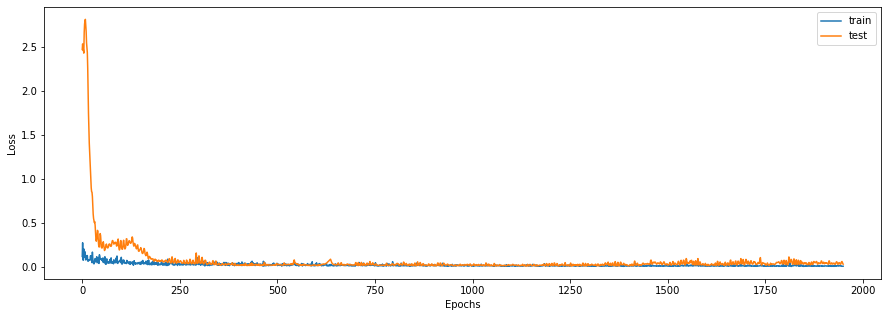

In [72]:
display_learning_curves(history)

In [73]:
x_test = test_data['Country ID'].to_numpy()

mse = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(np.sqrt(mse))

0.3426019505879234


In [74]:
original_mse/np.sqrt(mse)

25.712060617573655

In [75]:
list(zip(gnn_model(x_test).numpy()[:,0], y_test))

[(3.1579394, 3.230448921378274),
 (3.8865283, 3.5440680443502757),
 (4.3675942, 4.442479769064448),
 (3.7367945, 3.7993405494535817),
 (2.9925575, 2.9030899869919438),
 (3.1144428, 3.113943352306837),
 (4.0502353, 4.365487984890899),
 (3.8976455, 3.322219294733919),
 (3.6735497, 3.361727836017593),
 (3.6163387, 3.6720978579357175),
 (3.0866878, 2.9030899869919438),
 (3.7183857, 3.8692317197309762),
 (4.44669, 4.4623979978989565),
 (3.8148794, 3.462397997898956),
 (3.051972, 3.322219294733919),
 (4.23653, 3.8808135922807914),
 (3.466898, 4.02938377768521),
 (2.9759247, 2.845098040014257),
 (3.7459128, 3.5185139398778875),
 (4.3594527, 4.437750562820388),
 (3.1537547, 3.0),
 (3.028288, 3.041392685158225),
 (4.022939, 3.2041199826559246),
 (4.1687527, 4.269512944217916),
 (4.059462, 4.222716471147583),
 (4.3052716, 3.6334684555795866),
 (4.351316, 4.477121254719663),
 (4.359785, 3.9542425094393248),
 (3.0407646, 2.9542425094393248),
 (3.6867404, 3.7993405494535817),
 (3.2395973, 3.1760912